In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
from funcs_read_ds_cmip5 import check_modmeth
import funcs_general as gen
from funcs_read_ds_cmip5 import get_ds_metavars
import funcs_DS_eval as fdse
from importlib import reload


<module 'funcs_DS_eval' from '/glade/u/home/nlybarger/scripts/python_funcs/funcs_DS_eval.py'>

#### Plotting Notebook from which all paper plots are computed and generated, excepting Figures 2 and 3

In [2]:
#### Load all regional metrics into numpy array and dictionary
regions, bukods = fdse.make_buko_region_map('icargrid')
regions_geog = ['Pacific Northwest', 'Northern Plains', 'Great Lakes',
           'Pacific Southwest', 'Mountain West', 'North Atlantic',
            'Desert Southwest', 'Gulf Coast', 'Mid Atlantic']
pltmeth = {'ICAR':'ICARv1',      'ICARwest':'ICARv2', 
           'GARD_r2':'GARD-puv', 'GARD_r3':'GARD-quv', 
           'LOCA_8th':'LOCA',    'MACA':'MACA', 'NASA-NEX':'NASA-NEX'}
models, methods, _,_,_ = get_ds_metavars(FULL_LIST=True)
obsdsetlist = ['PRISM', 'CONUS404', 'Livneh', 'NLDAS', 'GMET', 'nClimGrid', 'gridMET']

mettypes = ['SpaceCorr', 'RMSE']  # Types of metrics for plotting
metvars = ['Temperature', 'Precipitation', 'Weather Typing']  # Types of variables for plotting
metlist_forplots = {}
for tmp in metvars:
    metlist_forplots[tmp] = {}

## Split the metrics into variable types and metric types
## T-P Correlation is placed in its own category with empty variable name
metlist_forplots['Temperature']['SpaceCorr'] = {
    'Nino3.4 T':    'n34t_r',
    'T-Trend':      'ttrend_r',
    'T90':          't90_r',
    'T99':          't99_r',
    'FT Cycles':    'freezethaw_r',
    'DJF T':        'djf_t_r',
    'MAM T':        'mam_t_r',
    'JJA T':        'jja_t_r',
    'SON T':        'son_t_r',
    'ANN T':        'ann_t_r',
    'DJF T IAV':    'djf_t_iav_r',
    'MAM T IAV':    'mam_t_iav_r',
    'JJA T IAV':    'jja_t_iav_r',
    'SON T IAV':    'son_t_iav_r',
    'ANN T IAV':    'ann_t_iav_r',
    'T-P Corr':     'tpcorr_r'
}

metlist_forplots['Temperature']['RMSE'] = {
    'Nino3.4 T':    'n34t_rmse',
    'T-Trend':      'ttrend_rmse',
    'T90':          't90_rmse',
    'T99':          't99_rmse',
    'FT Cycles':    'freezethaw_rmse',
    'DJF T':        'djf_t_rmse',
    'MAM T':        'mam_t_rmse',
    'JJA T':        'jja_t_rmse',
    'SON T':        'son_t_rmse',
    'ANN T':        'ann_t_rmse',
    'DJF T IAV':    'djf_t_iav_rmse',
    'MAM T IAV':    'mam_t_iav_rmse',
    'JJA T IAV':    'jja_t_iav_rmse',
    'SON T IAV':    'son_t_iav_rmse',
    'ANN T IAV':    'ann_t_iav_rmse',
    'T-P Corr':     'tpcorr_rmse'
}
# metlist_forplots[''][''] = {
#     'SpaceCorr: T-P Corr':     'tpcorr_r',
#     '     RMSE: T-P Corr':  'tpcorr_rmse'
# }

metlist_forplots['Precipitation']['SpaceCorr'] = {
    'Nino3.4 Pr':   'n34pr_r',
    'Pr-Trend':     'ptrend_r',
    'Pr90':         'pr90_r',
    'Pr99':         'pr99_r',
    'Pr GEV-20yr':  'pr_gev_20yr_r',
    'Pr GEV-50yr':  'pr_gev_50yr_r',
    'Pr GEV-100yr': 'pr_gev_100yr_r',
    'SPI1':         'drought_1yr_r',
    'SPI2':         'drought_2yr_r',
    'SPI5':         'drought_5yr_r',
    'Wet Day Frac': 'wet_day_frac_r',
    'DJF Pr':       'djf_p_r',
    'MAM Pr':       'mam_p_r',
    'JJA Pr':       'jja_p_r',
    'SON Pr':       'son_p_r',
    'ANN Pr':       'ann_p_r',
    'ANN Snow':     'ann_snow_r',
    'DJF Pr IAV':   'djf_p_iav_r',
    'MAM Pr IAV':   'mam_p_iav_r',
    'JJA Pr IAV':   'jja_p_iav_r',
    'SON Pr IAV':   'son_p_iav_r',
    'ANN Pr IAV':   'ann_p_iav_r',
    'ANN Snow IAV': 'ann_snow_iav_r'
}

metlist_forplots['Precipitation']['RMSE'] = {
    'Nino3.4 Pr':   'n34pr_rmse',
    'Pr-Trend':     'ptrend_rmse',
    'Pr90':         'pr90_rmse',
    'Pr99':         'pr99_rmse',
    'Pr GEV-20yr':  'pr_gev_20yr_rmse',
    'Pr GEV-50yr':  'pr_gev_50yr_rmse',
    'Pr GEV-100yr': 'pr_gev_100yr_rmse',
    'SPI1':         'drought_1yr_rmse',
    'SPI2':         'drought_2yr_rmse',
    'SPI5':         'drought_5yr_rmse',
    'Wet Day Frac': 'wet_day_frac_rmse',
    'DJF Pr':       'djf_p_rmse',
    'MAM Pr':       'mam_p_rmse',
    'JJA Pr':       'jja_p_rmse',
    'SON Pr':       'son_p_rmse',
    'ANN Pr':       'ann_p_rmse',
    'ANN Snow':     'ann_snow_rmse',
    'DJF Pr IAV':   'djf_p_iav_rmse',
    'MAM Pr IAV':   'mam_p_iav_rmse',
    'JJA Pr IAV':   'jja_p_iav_rmse',
    'SON Pr IAV':   'son_p_iav_rmse',
    'ANN Pr IAV':   'ann_p_iav_rmse',
    'ANN Snow IAV': 'ann_snow_iav_rmse'
}

metlist_forplots['Weather Typing']['SpaceCorr'] = {
    'WT0 DayToDay': 'wt0_daytoday_scorr',
    'WT1 DayToDay': 'wt1_daytoday_scorr',
    'WT2 DayToDay': 'wt2_daytoday_scorr',
    'WT3 DayToDay': 'wt3_daytoday_scorr',
    'WT4 DayToDay': 'wt4_daytoday_scorr',
    'WT5 DayToDay': 'wt5_daytoday_scorr',
    'WT0 Clim':     'wt0_clim_scorr',
    'WT1 Clim':     'wt1_clim_scorr',
    'WT2 Clim':     'wt2_clim_scorr',
    'WT3 Clim':     'wt3_clim_scorr',
    'WT4 Clim':     'wt4_clim_scorr',
    'WT5 Clim':     'wt5_clim_scorr'
}

metlist_forplots['Weather Typing']['RMSE'] = {
    'WT0 DayToDay': 'wt0_daytoday_rmse',
    'WT1 DayToDay': 'wt1_daytoday_rmse',
    'WT2 DayToDay': 'wt2_daytoday_rmse',
    'WT3 DayToDay': 'wt3_daytoday_rmse',
    'WT4 DayToDay': 'wt4_daytoday_rmse',
    'WT5 DayToDay': 'wt5_daytoday_rmse',
    'WT0 Clim':     'wt0_clim_rmse',
    'WT1 Clim':     'wt1_clim_rmse',
    'WT2 Clim':     'wt2_clim_rmse',
    'WT3 Clim':     'wt3_clim_rmse',
    'WT4 Clim':     'wt4_clim_rmse',
    'WT5 Clim':     'wt5_clim_rmse'
}
data_metlist = []
for var in metlist_forplots:
    for mtype in metlist_forplots[var]:
        data_metlist.extend(list(metlist_forplots[var][mtype].values()))

nreg = len(regions)
nmod = len(models)
nmeth = len(methods)
nobs = len(obsdsetlist)
nmet = len(data_metlist)
nwt = 6

In [ ]:
# Prepare coordinates
coords = {
    'regions': regions,
    'models': models,
    'methods': methods,
    'obs': obsdsetlist,
    'metric': data_metlist
}

# Initialize an empty array to store the metrics
metrics_np_from_nc = np.full((nreg, nmod, nmeth, nobs, nmet), np.nan)

diri = '/glade/work/nlybarger/downscaling_metrics/cmip5/buko_regions/'
for ireg, region in enumerate(regions):
    regname = region.replace(' ', '')
    for imod, model in enumerate(models):
        for imeth, method in enumerate(methods):
            if not check_modmeth(model, method, reg=region):
                continue
            fili = f'{diri}{regname}/{model}.{method}.hist.1981-2016.ds.{regname}.metrics.nc'
            ds = xr.open_dataset(fili)
            for iobs, obs in enumerate(obsdsetlist):
                for imet, metric in enumerate(data_metlist):
                    if metric in ds.data_vars:
                        metrics_np_from_nc[ireg, imod, imeth, iobs, imet] = ds.sel(obs=obs)[metric].item()
                    else:
                        print(f'Metric {metric} not found in {fili}')

# Create DataArray and Dataset
metrics_da = xr.DataArray(
    metrics_np_from_nc,
    dims=('regions', 'models', 'methods', 'obs', 'metric'),
    coords=coords
)
metrics_ds = metrics_da.to_dataset(dim='metric')

# Compute normalization factors for each metric using GARDLENS and obs
# This function is defined in funcs_DS_eval.py, and simply loads prestored factors unless COMPUTE=True
normalizers = fdse.gardlens_normalizers()

In [4]:
# Initialize arrays to store normalized metrics
metrics_obsm = metrics_ds.copy().mean(dim='obs', skipna=True)
varlist = list(normalizers['metric'].data)
normschemes = ['equal', 'equal_noWT', 'obsstd', 'ensstd', 'combstd']

errmat = {}
obsnorm = {}
ensnorm = {}
combnorm = {}
normerr_np = {}
for imet in range(len(varlist)):
    met = str(varlist[imet])
    obsnorm[met] = {}
    ensnorm[met] = {}
    combnorm[met] = {}
    normerr_np[met] = {}
    errmat[met] = np.full((len(regions), len(models), len(methods)), np.nan)
    normerr_np[met] = np.full((len(regions), len(models), len(methods), len(normschemes)), np.nan)

    if met.split('_')[-1] == 'rmse':
        errmat[met] = metrics_obsm[met].data
    else:
        errmat[met] = np.abs(metrics_obsm[met].data - 1)
    for ireg, reg in enumerate(regions):
        obsnorm[met][reg] = normalizers['obsstd'].data[ireg, imet]
        ensnorm[met][reg] = normalizers['ensstd'].data[ireg, imet]
        combnorm[met][reg] = normalizers['combstd'].data[ireg, imet]
del imet
del met

normthresh = 40.0
normfrac = .99
print(len(varlist))
for ireg, reg in enumerate(regions):
    for imet, met in enumerate(varlist):

        ## Using equal normalization (with and without WT metrics)
        min_val = np.nanmin(errmat[met][ireg, :, :])
        max_val = np.nanmax(errmat[met][ireg, :, :])
        if min_val != max_val:
            normerr_np[met][ireg, :, :, 0] = (errmat[met][ireg, :, :] - min_val) / (max_val - min_val)
            if met[:2] != 'wt':
                normerr_np[met][ireg, :, :, 1] = (errmat[met][ireg, :, :] - min_val) / (max_val - min_val)
            else:
                normerr_np[met][ireg, :, :, 1] = 0.

        ## Using normalization by observational stdev
        normerr_np[met][ireg, :, :, 2] = errmat[met][ireg, :, :] / (obsnorm[met][reg])
        obsmodfrac = 1.0
        if np.nanmax(normerr_np[met][ireg, :, :, 2]) > normthresh:
            start_err = np.nanmax(normerr_np[met][ireg, :, :, 2])
            print(f'High normalized error for {met} in {reg} for obsstd: {np.nanmax(normerr_np[met][ireg, :, :, 2])}')
            while np.nanmax(normerr_np[met][ireg, :, :, 2]) > normthresh:
                normerr_np[met][ireg, :, :, 2] = normerr_np[met][ireg, :, :, 2] * normfrac
            end_err = np.nanmax(normerr_np[met][ireg, :, :, 2])
            obsmodfrac = end_err / start_err
            del end_err
            del start_err
            print(f'Outlier has been reduced by: {obsmodfrac}')

        ## Using normalization by ensemble stdev
        ensmodfrac = 1.0
        normerr_np[met][ireg, :, :, 3] = errmat[met][ireg, :, :] / (ensnorm[met][reg])
        if np.nanmax(normerr_np[met][ireg, :, :, 3]) > normthresh:
            start_err = np.nanmax(normerr_np[met][ireg, :, :, 3])
            print(f'High normalized error for {met} in {reg} for ensstd: {np.nanmax(normerr_np[met][ireg, :, :, 3])}')
            while np.nanmax(normerr_np[met][ireg, :, :, 3]) > normthresh:
                normerr_np[met][ireg, :, :, 3] = normerr_np[met][ireg, :, :, 3] * normfrac
            print(f'New value: {np.nanmax(normerr_np[met][ireg, :, :, 3])}')
            end_err = np.nanmax(normerr_np[met][ireg, :, :, 3])
            ensmodfrac = end_err / start_err
            print(f'Outlier has been reduced by: {ensmodfrac}')

        normerr_np[met][ireg, :, :, 4] = errmat[met][ireg, :, :] / ((ensnorm[met][reg] * (1/ensmodfrac))**2 + (obsnorm[met][reg] * (1/obsmodfrac))**2)**0.5

normerr = xr.Dataset(
    coords = {
            'regions': regions,
            'models' : models,
            'methods': methods,
            'normscheme': normschemes
    }
)
for met in list(normerr_np.keys()):
    normerr[met] = (('regions', 'models', 'methods', 'normscheme'), normerr_np[met])

102
High normalized error for pr90_r in North Atlantic for ensstd: 42.590481232539
New value: 39.697111707532585
Outlier has been reduced by: 0.9320653479069899
High normalized error for pr90_rmse in North Atlantic for ensstd: 49.36563110601684
New value: 39.97272723887207
Outlier has been reduced by: 0.8097278682212585
High normalized error for pr99_r in North Atlantic for ensstd: 42.04382866122651
New value: 39.98326271652685
Outlier has been reduced by: 0.9509900499
High normalized error for pr99_rmse in North Atlantic for ensstd: 48.670471051576186
New value: 39.80791592920934
Outlier has been reduced by: 0.8179069375972305
High normalized error for t90_r in North Atlantic for ensstd: 79.72851100351036
New value: 39.85126213828024
Outlier has been reduced by: 0.4998370298991992
High normalized error for t99_r in North Atlantic for ensstd: 55.5172774678279
New value: 39.84644512539033
Outlier has been reduced by: 0.717730532598275
High normalized error for mam_t_r in North Atlantic 

Temperature
Precipitation
Weather Typing
0
Temperature
RMSE
['n34t_rmse', 'ttrend_rmse', 't90_rmse', 't99_rmse', 'freezethaw_rmse', 'djf_t_rmse', 'mam_t_rmse', 'jja_t_rmse', 'son_t_rmse', 'ann_t_rmse', 'djf_t_iav_rmse', 'mam_t_iav_rmse', 'jja_t_iav_rmse', 'son_t_iav_rmse', 'ann_t_iav_rmse', 'tpcorr_rmse']
Temperature
SpaceCorr
['n34t_r', 'ttrend_r', 't90_r', 't99_r', 'freezethaw_r', 'djf_t_r', 'mam_t_r', 'jja_t_r', 'son_t_r', 'ann_t_r', 'djf_t_iav_r', 'mam_t_iav_r', 'jja_t_iav_r', 'son_t_iav_r', 'ann_t_iav_r', 'tpcorr_r']
1
Precipitation
RMSE
['n34pr_rmse', 'ptrend_rmse', 'pr90_rmse', 'pr99_rmse', 'pr_gev_20yr_rmse', 'pr_gev_50yr_rmse', 'pr_gev_100yr_rmse', 'drought_1yr_rmse', 'drought_2yr_rmse', 'drought_5yr_rmse', 'wet_day_frac_rmse', 'djf_p_rmse', 'mam_p_rmse', 'jja_p_rmse', 'son_p_rmse', 'ann_p_rmse', 'ann_snow_rmse', 'djf_p_iav_rmse', 'mam_p_iav_rmse', 'jja_p_iav_rmse', 'son_p_iav_rmse', 'ann_p_iav_rmse', 'ann_snow_iav_rmse']
Precipitation
SpaceCorr
['n34pr_r', 'ptrend_r', 'pr90_r

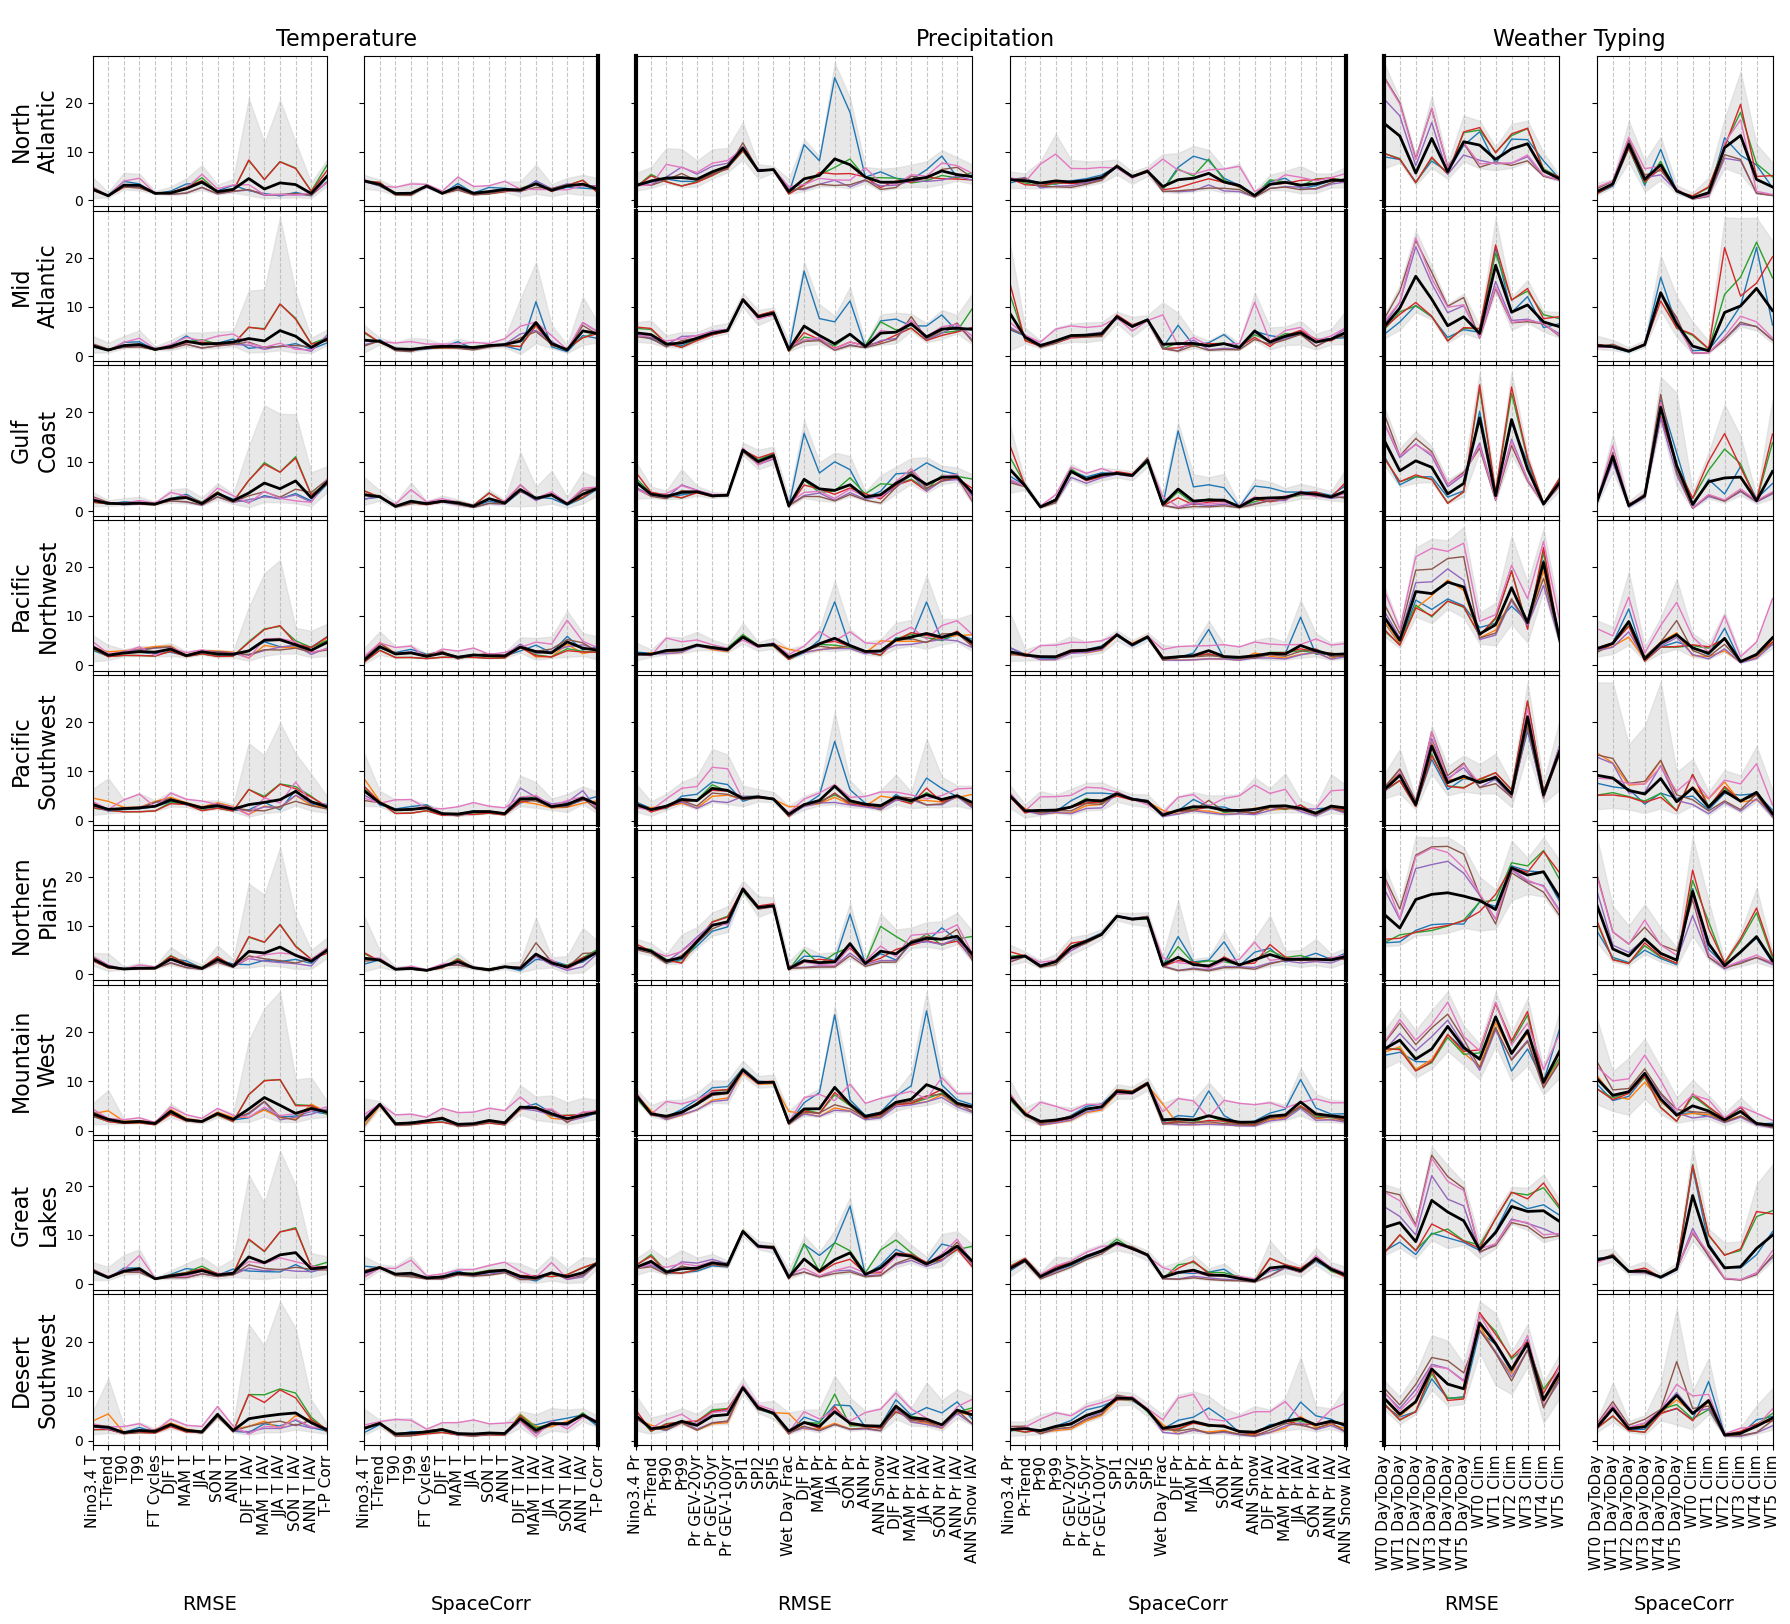

In [ ]:
# Figure 4

pltwidths = []
wtmets = ['RMSE', 'SpaceCorr']
i=0
for var in metvars:
    print(var)
    if var == '':
        tmpmets = ['']
        pltwidths.append(1)
    else:
        tmpmets = wtmets
        for mettype in tmpmets:
            pltwidths.append(len(metlist_forplots[var][mettype].keys()))
            i+=1

import matplotlib.gridspec as gridspec

for normy in ['combstd']:
    ncol = 6
    fig, axs = plt.subplots(9, ncol, figsize=(18,16), sharey='row', gridspec_kw={'width_ratios': pltwidths})
    axs = axs.flatten()
    cmap = plt.get_cmap('tab10')

    maxi = normerr.sel(normscheme=normy).max(dim=['models', 'methods'], skipna=True)
    mini = normerr.sel(normscheme=normy).min(dim=['models', 'methods'], skipna=True)
    meani = normerr.sel(normscheme=normy).mean(dim=['models', 'methods'], skipna=True)
    modmeani = normerr.sel(normscheme=normy).mean(dim=['models'], skipna=True)
    for ivar, var in enumerate(metvars):
        print(ivar)
        for itype, mettype in enumerate(wtmets):
            print(var)
            print(mettype)
            metlist = list(metlist_forplots[var][mettype].values())
            print(metlist)
            pltlist = list(metlist_forplots[var][mettype].keys())
            x = np.arange(len(metlist))

            for ireg, reg in enumerate(regions):
                ax = axs[ireg*ncol + ivar*2 + itype]
                plt.sca(ax)
                tmpmax = maxi.sel(regions=reg)
                tmpmin = mini.sel(regions=reg)
                tmpmean = meani.sel(regions=reg)
                tmpmodmean = modmeani.sel(regions=reg)
                # Convert metlist to numpy array for indexing
                metlist_arr = np.array(metlist)

                # Extract values from tmpmax, tmpmin, tmpmean for the current metrics
                y_max_arr = np.array([tmpmax[metric].item() for metric in metlist])
                y_min_arr = np.array([tmpmin[metric].item() for metric in metlist])
                y_mean_arr = np.array([tmpmean[metric].item() for metric in metlist])

                # Extract model means for the current metrics (for the selected model)
                # y_modmean_arr should be shape (nmeth, len(metlist)): each row is a method, each column is a metric
                y_modmean_arr = np.array([
                    [tmpmodmean[metric].sel(methods=methods[imeth]).item() for metric in metlist]
                    for imeth in range(nmeth)
                ])

                plt.fill_between(x, y_min_arr, y_max_arr, color='lightgray', alpha=0.5, label='Min/Max')
                plt.plot(x, y_mean_arr, color='black', linewidth=2, label='Mean', zorder=10)
                for imeth, meth in enumerate(methods):
                    plt.plot(x, y_modmean_arr[imeth], color=cmap(imeth), label=pltmeth[methods[imeth]], linewidth=1)
                plt.grid(axis='x', linestyle='--', alpha=0.7)
                plt.xlim(0, len(metlist)-1)
                if ireg == nreg-1:
                    ax.set_xticks(x)
                    ax.set_xticklabels(pltlist, 
                                    rotation=90, 
                                    fontsize=11,
                                    ha='center')
                    ax.set_xlabel(mettype, fontsize=14, labelpad=10)
                    # Move x-labels up to a consistent height
                    ax.xaxis.set_label_coords(0.5, -1.)
                else:
                    ax.set_xticks(x)
                    ax.set_xticklabels([])

                # Add space between columns 2 and 3, and between columns 5 and 6

                if (ivar == 0) and (itype == 0):
                    plt.ylabel(reg.replace(' ', '\n'), fontsize=16)
                if (ireg == 0) and (ivar == 1) and (itype == 0):
                    plt.title(' ', fontsize=16, loc='left', pad=20)
                if (ireg == 4) and (ivar == 3) and (itype == 1):
                    handles, labels = ax.get_legend_handles_labels()
                    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=12)

    for ireg in range(nreg):
        # After column 2 (index 1), add space before column 3 (index 2)
        axs[ireg*ncol + 1].spines['right'].set_linewidth(3)
        axs[ireg*ncol + 2].spines['left'].set_linewidth(3)
        # After column 5 (index 4), add space before column 6 (index 5)
        axs[ireg*ncol + 3].spines['right'].set_linewidth(3)
        axs[ireg*ncol + 4].spines['left'].set_linewidth(3)

    # Add a new text annotation between axes 6 and 7
    fig.text(
        0.195,  # x-position (adjust as needed for your layout)
        0.965,  # y-position (adjust as needed for your layout)
        'Temperature',
        fontsize=16,
        ha='center',
        va='bottom'
    )
    fig.text(
        0.55,  # x-position (adjust as needed for your layout)
        0.965,  # y-position (adjust as needed for your layout)
        'Precipitation',
        fontsize=16,
        ha='center',
        va='bottom'
    )
    fig.text(
        0.88,  # x-position (adjust as needed for your layout)
        0.965,  # y-position (adjust as needed for your layout)
        'Weather Typing',
        fontsize=16,
        ha='center',
        va='bottom'
    )
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.15)
    # plt.suptitle(normy.capitalize() + ' Normalized Error Metrics by Region', fontsize=20, y=1.02)

plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/combined_error_plot.png', dpi=300, bbox_inches='tight')

In [18]:
metlist

['wt0_daytoday_scorr',
 'wt1_daytoday_scorr',
 'wt2_daytoday_scorr',
 'wt3_daytoday_scorr',
 'wt4_daytoday_scorr',
 'wt5_daytoday_scorr',
 'wt0_clim_scorr',
 'wt1_clim_scorr',
 'wt2_clim_scorr',
 'wt3_clim_scorr',
 'wt4_clim_scorr',
 'wt5_clim_scorr']

In [ ]:


# Sum over all metrics in normerr for each normalization scheme
# Create a DataArray for normerr_sum with dimensions (regions, models, methods, normscheme)
normerr_sum_arr = np.full((nreg, nmod, nmeth, len(normschemes)), np.nan)

for ischeme, scheme in enumerate(normschemes):
    # Sum over all metrics for each normalization scheme
    sum_arr = np.zeros((nreg, nmod, nmeth))
    for var in normerr.data_vars:
        sum_arr += normerr[var].sel(normscheme=scheme).values
    sum_arr[sum_arr == 0] = np.nan
    normerr_sum_arr[..., ischeme] = sum_arr

normerr_sum_ds = xr.Dataset(
    {"normerr_sum": (("regions", "models", "methods", "normscheme"), normerr_sum_arr)},
    coords={
        "regions": regions,
        "models": models,
        "methods": methods,
        "normscheme": normschemes
    }
)

normerr_sum_ds['normerr_mean'] = (("regions", "models", "methods", "normscheme"), np.full(normerr_sum_arr.shape, np.nan))
for ischeme, scheme in enumerate(normschemes):
    if scheme == 'equal_noWT':
        # Find number of variables in normalizers['metric'] that do not begin with 'wt'
        nvar = sum([not str(m).startswith('wt') for m in normalizers['metric'].values])
        normerr_sum_ds['normerr_mean'].loc[dict(normscheme=scheme)] = (
            normerr_sum_ds['normerr_sum'].sel(normscheme=scheme) / nvar)
    else:
        nvar = len(normalizers['metric'])
        normerr_sum_ds['normerr_mean'].loc[dict(normscheme=scheme)] = (
        normerr_sum_ds['normerr_sum'].sel(normscheme=scheme)/nvar)

def normalize_error_scores(metmeanerr):
    min_val = np.nanmin(metmeanerr)
    # min_val = normerr_sum_ds['normerr_sum'].min(skipna=True).item()
    # max_val = normerr_sum_ds['normerr_sum'].max(skipna=True).item()
    max_val = np.nanmax(metmeanerr)
    if min_val != max_val:
        return (metmeanerr - min_val) / (max_val - min_val)

normerr_sum_ds['norm_err_score'] = (['regions', 'models', 'methods', 'normscheme'], np.full(normerr_sum_ds['normerr_sum'].shape, np.nan))
for ireg, region in enumerate(regions):
    for scheme in normerr_sum_ds.normscheme.values:
        normerr_sum_ds['norm_err_score'].loc[dict(regions=region, normscheme=scheme)] = (
            normalize_error_scores(normerr_sum_ds['normerr_sum'].sel(regions=region, normscheme=scheme).values))


# Get the dimensions and coordinates from normerr
dims = normerr.dims
coords = {dim: normerr.coords[dim] for dim in dims}

# Find all variable prefixes (before the first underscore)
prefixes = ['n34t', 'ttrend', 
            't90', 't99', 'freezethaw',
            'djf_t', 'mam_t', 'jja_t', 'son_t', 'ann_t',
            'djf_t_iav', 'mam_t_iav', 'jja_t_iav', 'son_t_iav', 'ann_t_iav',
            'tpcorr', 
            'n34pr', 'ptrend', 'pr90', 'pr99', 'pr_gev_20yr', 'pr_gev_50yr', 'pr_gev_100yr',
            'drought_1yr', 'drought_2yr', 'drought_5yr',
            'djf_p', 'mam_p', 'jja_p', 'son_p', 'ann_p', 'ann_snow',
            'djf_p_iav', 'mam_p_iav', 'jja_p_iav', 'son_p_iav', 'ann_p_iav', 'ann_snow_iav', 'wt']

# Create a new dataset to hold the summed variables
summed_vars = {}

for prefix in prefixes:
    for statistic in ['_r', '_rmse']:
        if prefix != 'wt':
            matching_vars = [var for var in normerr.data_vars if var == (prefix + statistic)]
    if prefix == 'wt':
        matching_vars = [var for var in normerr.data_vars if var.startswith(prefix)]
    # Sum across these variables
    if matching_vars:
        if prefix == 'wt':
            # For weather typing, sum separately for day-to-day and climatology metrics
            day_to_day_vars = [var for var in matching_vars if '_daytoday_' in var ]
            clim_vars = [var for var in matching_vars if '_clim_' in var ]
            summed_data_day = sum(normerr[var] for var in day_to_day_vars)
            summed_data_clim = sum(normerr[var] for var in clim_vars)
            summed_vars[f'{prefix}_daytoday'] = (dims, summed_data_day.data)
            summed_vars[f'{prefix}_clim'] = (dims, summed_data_clim.data)
        else:
            summed_data = sum(normerr[var] for var in matching_vars)
            summed_vars[prefix] = (dims, summed_data.data)

summed_normerr = xr.Dataset(summed_vars, coords=coords)
summed_normerr.to_netcdf('/glade/work/nlybarger/downscaling_metrics/cmip5/Normalized_Error_Metrics_CMIP5.nc')

# Sum all data variables in summed_normerr across the variable dimension
summed_total = sum(summed_normerr[var] for var in summed_normerr.data_vars)


for ireg, reg in enumerate(regions):
    print(reg)
    mini = summed_total.sel(regions=reg, normscheme='combstd')
    # Find the indices of the minimum value
    idx = np.unravel_index(np.nanargmin(mini.values), mini.shape)
    method = mini.methods.values[idx[0]]
    model = mini.models.values[idx[1]]
    print(f"Region: {reg}, Min Method: {method}, Min Model: {model}")

data = {}
for region in regions:
    print(region)
    data[region] = summed_total.copy().sel(regions=region, normscheme='combstd')
    idx = np.unravel_index((data[region].argmin(skipna=True)), data[region].shape)
    print(idx)
    print(data[region].models.values[idx[0]], data[region].methods.values[idx[1]])
    print('====================')


# Find the model and method with the minimum summed_total for each region and normscheme
min_results = {}

for ireg, region in enumerate(regions):
    min_results[region] = {}
    # for scheme in normschemes:
    for scheme in ['combstd']:
        # Select the data for the current region and normscheme
        data = summed_total.copy().sel(regions=region, normscheme=scheme)
        # Find the indices of the minimum value
        idx = np.unravel_index(np.nanargmin(data.values), data.shape)
        model = data.models.values[idx[0]]
        method = data.methods.values[idx[1]]
        min_value = data.values[idx]
        min_results[region][scheme] = {'model': model, 'method': method, 'value': min_value}

# Display the results
for region in regions:
    print(f"Region: {region}")
    # for scheme in normschemes:
    for scheme in ['combstd']:
        res = min_results[region][scheme]
        print(f"  Normscheme: {scheme} -> Model: {res['model']}, Method: {res['method']}, Min Value: {res['value']:.4f}")



/glade/derecho/scratch/nlybarger/tmp/ipykernel_13040/15819442.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


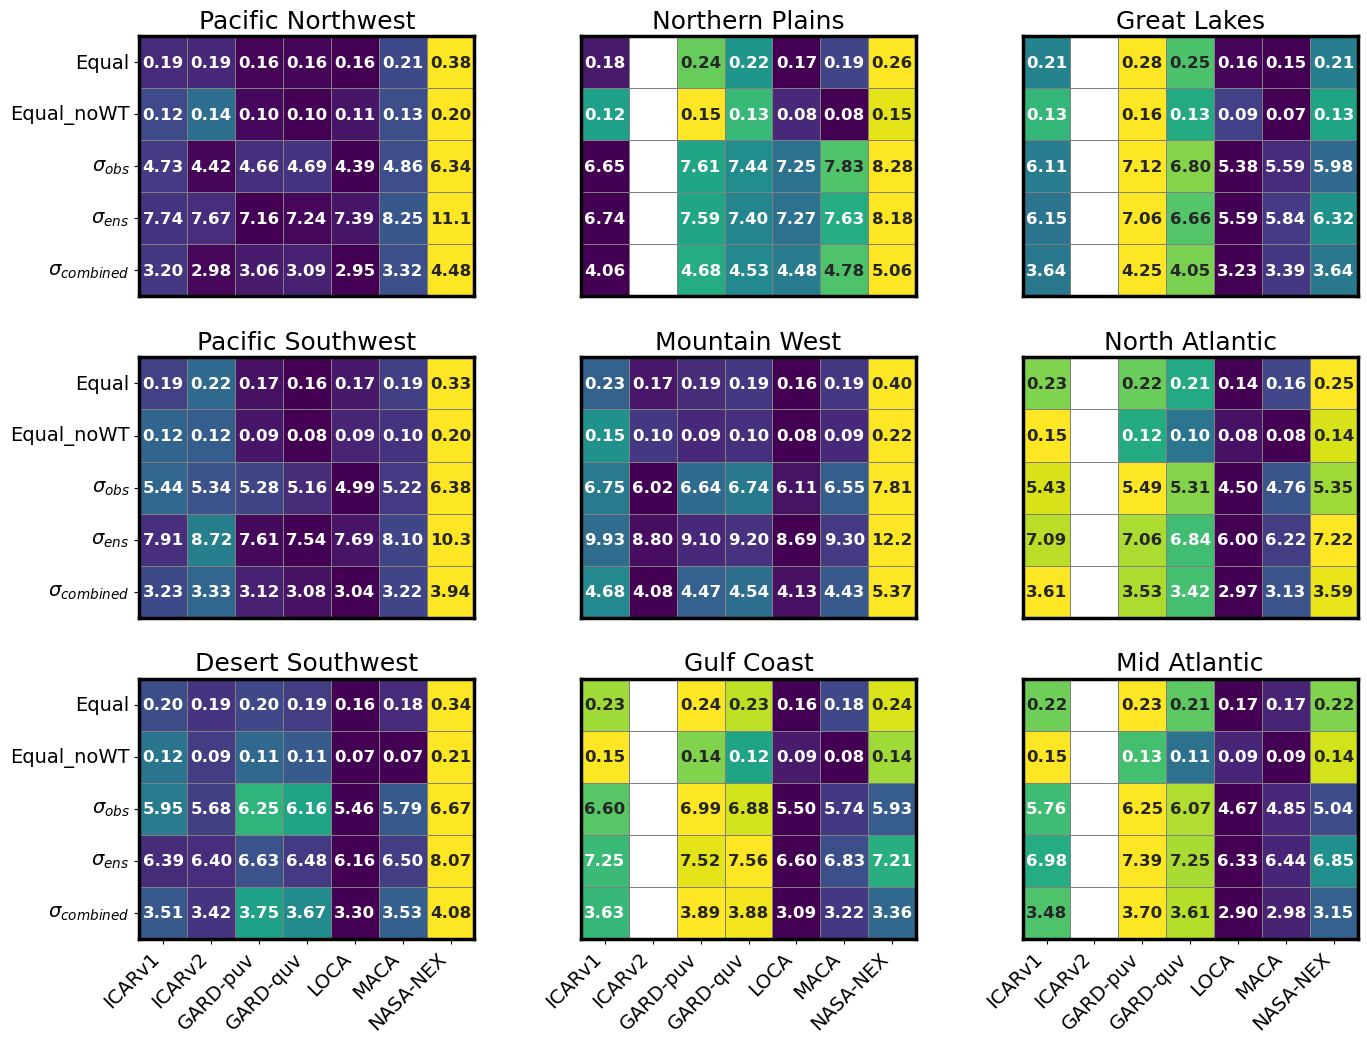

In [ ]:
# Figure 7

weighting_schemes = ['Equal', 'Equal_noWT', r'$\sigma_{obs}$', r'$\sigma_{ens}$', r'$\sigma_{combined}$']
norm_labels = {'equal': 'Equal', 'equal_noWT': 'Equal_noWT', 'obsstd': r'$\sigma_{obs}$', 'ensstd': r'$\sigma_{ens}$', 'combstd': r'$\sigma_{combined}$'}
keylist = list(norm_labels.keys())
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(16, 12), constrained_layout=True)
axs = axes.flatten()
keylist = list(norm_labels.keys())
# tmp = summed_total/len(data_metlist)
for ireg, region in enumerate(regions_geog):
    ax = axs[ireg]
    
    # Extract error scores for the current region
    # region_scores = np.array([error_score[scheme][ireg, :] for scheme in keylist])
    tmp = (summed_total.sel(regions=region)/len(data_metlist)).mean(dim='models')
    region_scores = np.array([(tmp.sel(normscheme = scheme)-tmp.sel(normscheme=scheme).min())/(tmp.sel(normscheme=scheme).max()-tmp.sel(normscheme=scheme).min()) for scheme in keylist])
    annote_text = np.array([tmp.sel(normscheme = scheme) for scheme in keylist])

    # Create a heatmap
    # Determine if this subplot is in the rightmost columns (2 or 3)
    col = ireg % 3
    row = ireg // 3

    def format_number(val, scheme):
        if np.isnan(val):
            return ""
        if scheme in ['equal', 'equal_noWT']:
            return f"{val:.2f}"
        else:
            return f"{val:.1f}"

    # Build annotation array with appropriate rounding per scheme
    annot = np.empty_like(annote_text, dtype=object)
    for i, scheme in enumerate(keylist):
        for j in range(annote_text.shape[1]):
            val = annote_text[i, j]
            if np.isnan(val):
                annot[i, j] = ""
            elif abs(val) < 1:
                annot[i, j] = f"{val:.2f}"
            elif 1 <= abs(val) < 10:
                annot[i, j] = f"{val:.2f}"
            else:
                annot[i, j] = f"{val:.1f}"

    # Only show yticklabels on the leftmost column, xticklabels on the bottom row
    show_yticklabels = (col == 0)
    show_xticklabels = (row == 2)

    sns.heatmap(
        region_scores.reshape(len(keylist), -1),
        annot=annot,
        fmt="",
        cmap="viridis",
        cbar=False,
        ax=ax,
        xticklabels=[pltmeth[k] for k in pltmeth.keys()] if show_xticklabels else False,
        yticklabels=[norm_labels[k] for k in keylist] if show_yticklabels else False,
        linewidths=0.5,
        linecolor='gray',
        annot_kws={"weight": "bold", "fontsize": 12}
    )
    # Move xlabels to the left by adjusting their position
    plt.draw()
    if show_xticklabels:
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

    # Bold, black axis splines
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)
        spine.set_color('black')

    
    # Set titles and labels
    ax.set_title(region, fontsize=18)
    # ax.set_xlabel("Downscaling Methods", fontsize=14)
    # ax.set_ylabel("Weighting Schemes", fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=14)
    ax.tick_params(axis='y', rotation=0,  labelsize=14)

# Add a global title
# fig.suptitle("Normalized Error Scores Relative to Region and Weighting Scheme", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/normerr_heatmap_fullval.png', dpi=300, bbox_inches='tight')

#### Determine Uncertainty Partitioning region-by-region

In [ ]:
# Uncertainty partitioning (Eqs. 4-7 in the paper)

mod_var = metrics_ds.var('models', skipna=True).mean(dim=['methods', 'obs'], skipna=True)
meth_var = metrics_ds.var('methods', skipna=True).mean(dim=['models', 'obs'], skipna=True)
obs_var = metrics_ds.var('obs', skipna=True).mean(dim=['models', 'methods'], skipna=True)

var_tot = mod_var + meth_var + obs_var

mod_var_tot = mod_var / var_tot
meth_var_tot = meth_var / var_tot
obs_var_tot = obs_var / var_tot

#### Sum the variability across all metrics

['RMSE', 'SpaceCorr']
0
1
['RMSE', 'SpaceCorr']
2
3


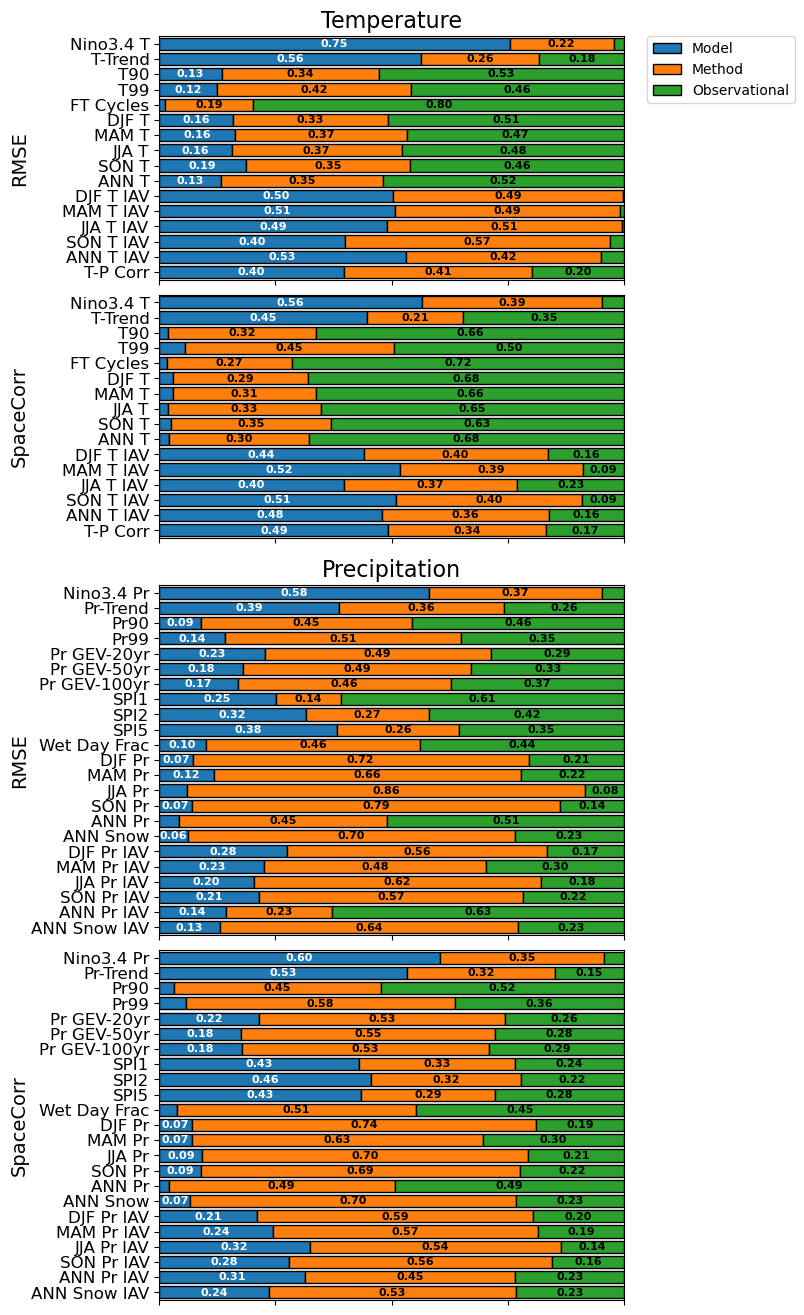

In [ ]:
## Figure 5

pltheights = []
wtmets = ['RMSE', 'SpaceCorr']
ptmets = ['RMSE', 'SpaceCorr']
for var in metvars[:2]:
    # if var == '':
    #     tmpmets = ['']
    #     pltheights.append(2)
    # else:
    tmpmets = wtmets
    for mettype in tmpmets:
        # print(mettype)
        pltheights.append(len(metlist_forplots[var][mettype].keys()))
        # print(pltwidths[i])


# Define the x-axis positions
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(6,16))
gs = gridspec.GridSpec(4,1, height_ratios=pltheights)  # Adjust the width ratio of the third column
axs = [fig.add_subplot(gs[i, j]) for i in range(4) for j in range(1)]

cmap = plt.get_cmap('tab10')
plthresh = 0.06
for ivar, var in enumerate(metvars[:2]):
    # if var == '':
    #     tmpmets = ['']
    # else:
    tmpmets = wtmets
    print(tmpmets)
    for itype, mettype in enumerate(tmpmets):
        metlist = list(metlist_forplots[var][mettype].values())
        pltlist = list(metlist_forplots[var][mettype].keys())
        metlist = metlist[::-1]
        pltlist = pltlist[::-1]
        y = np.arange(len(metlist))
        # if ivar <= 1:
        print(ivar*2+itype)
        ax = axs[ivar*2 + itype]
        # else:
        #     ax = axs[ivar*2 + itype - 1]

        plt.sca(ax)
        y_mod = np.array([mod_var_tot[metric].mean(dim=['regions'], skipna=True).item() for metric in metlist])
        y_meth = np.array([meth_var_tot[metric].mean(dim=['regions'], skipna=True).item() for metric in metlist])
        y_obs = np.array([obs_var_tot[metric].mean(dim=['regions'], skipna=True).item() for metric in metlist])
        # Plot the stacked bar chart
        ax.barh(y, y_mod, label='Model', color=cmap(0), edgecolor='black')
        ax.barh(y, y_meth, left=y_mod, label='Method', color=cmap(1), edgecolor='black')
        ax.barh(y, y_obs, left=y_mod + y_meth, label='Observational', color=cmap(2), edgecolor='black')

        for j in range(len(y)):
            modval = y_mod[j]
            methval = y_meth[j]
            obsval = y_obs[j]
            if modval >= plthresh:
                ax.text(modval/2, y[j], f'{modval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold',c='white')
            if methval >= plthresh:
                ax.text(modval + methval/2, y[j], f'{methval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')
            if obsval >= plthresh:
                ax.text(modval + methval + obsval/2, y[j], f'{obsval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')

        ax.set_yticks(y)
        ax.set_yticklabels(pltlist, fontsize=12)
        ax.set_xlim([0, 1])
        ax.set_ylim([-0.51, len(metlist)-0.49])
        ax.set_ylabel(mettype, fontsize=14)
        ax.yaxis.set_label_coords(-0.28, 0.5)  # Adjust the y-coordinate for better label positioning
        if itype == 0:
            plt.title(var, fontsize=16)
            if ivar == 0:
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        if (ivar == 2) and (itype == 1):
            ax.set_xticks([0,.25,.5,.75,1])
            ax.set_xticklabels(['0','0.25','0.5','0.75','1'])
        else:
            ax.set_xticks([0,.25,.5,.75,1])
            ax.set_xticklabels([])
            # Increase vertical space only between axes 2 and 3
            # Shift all axes after axis 2 down to make space between axes 2 and 3
plt.subplots_adjust(hspace=0.05)
plt.draw()
for i, ax in enumerate(axs):
    if i > 1:
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0 - 0.02, pos.width, pos.height])

# plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/regionalDS_split_uncertainty.png', dpi=300, bbox_inches='tight')


['RMSE', 'SpaceCorr']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
['RMSE', 'SpaceCorr']
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


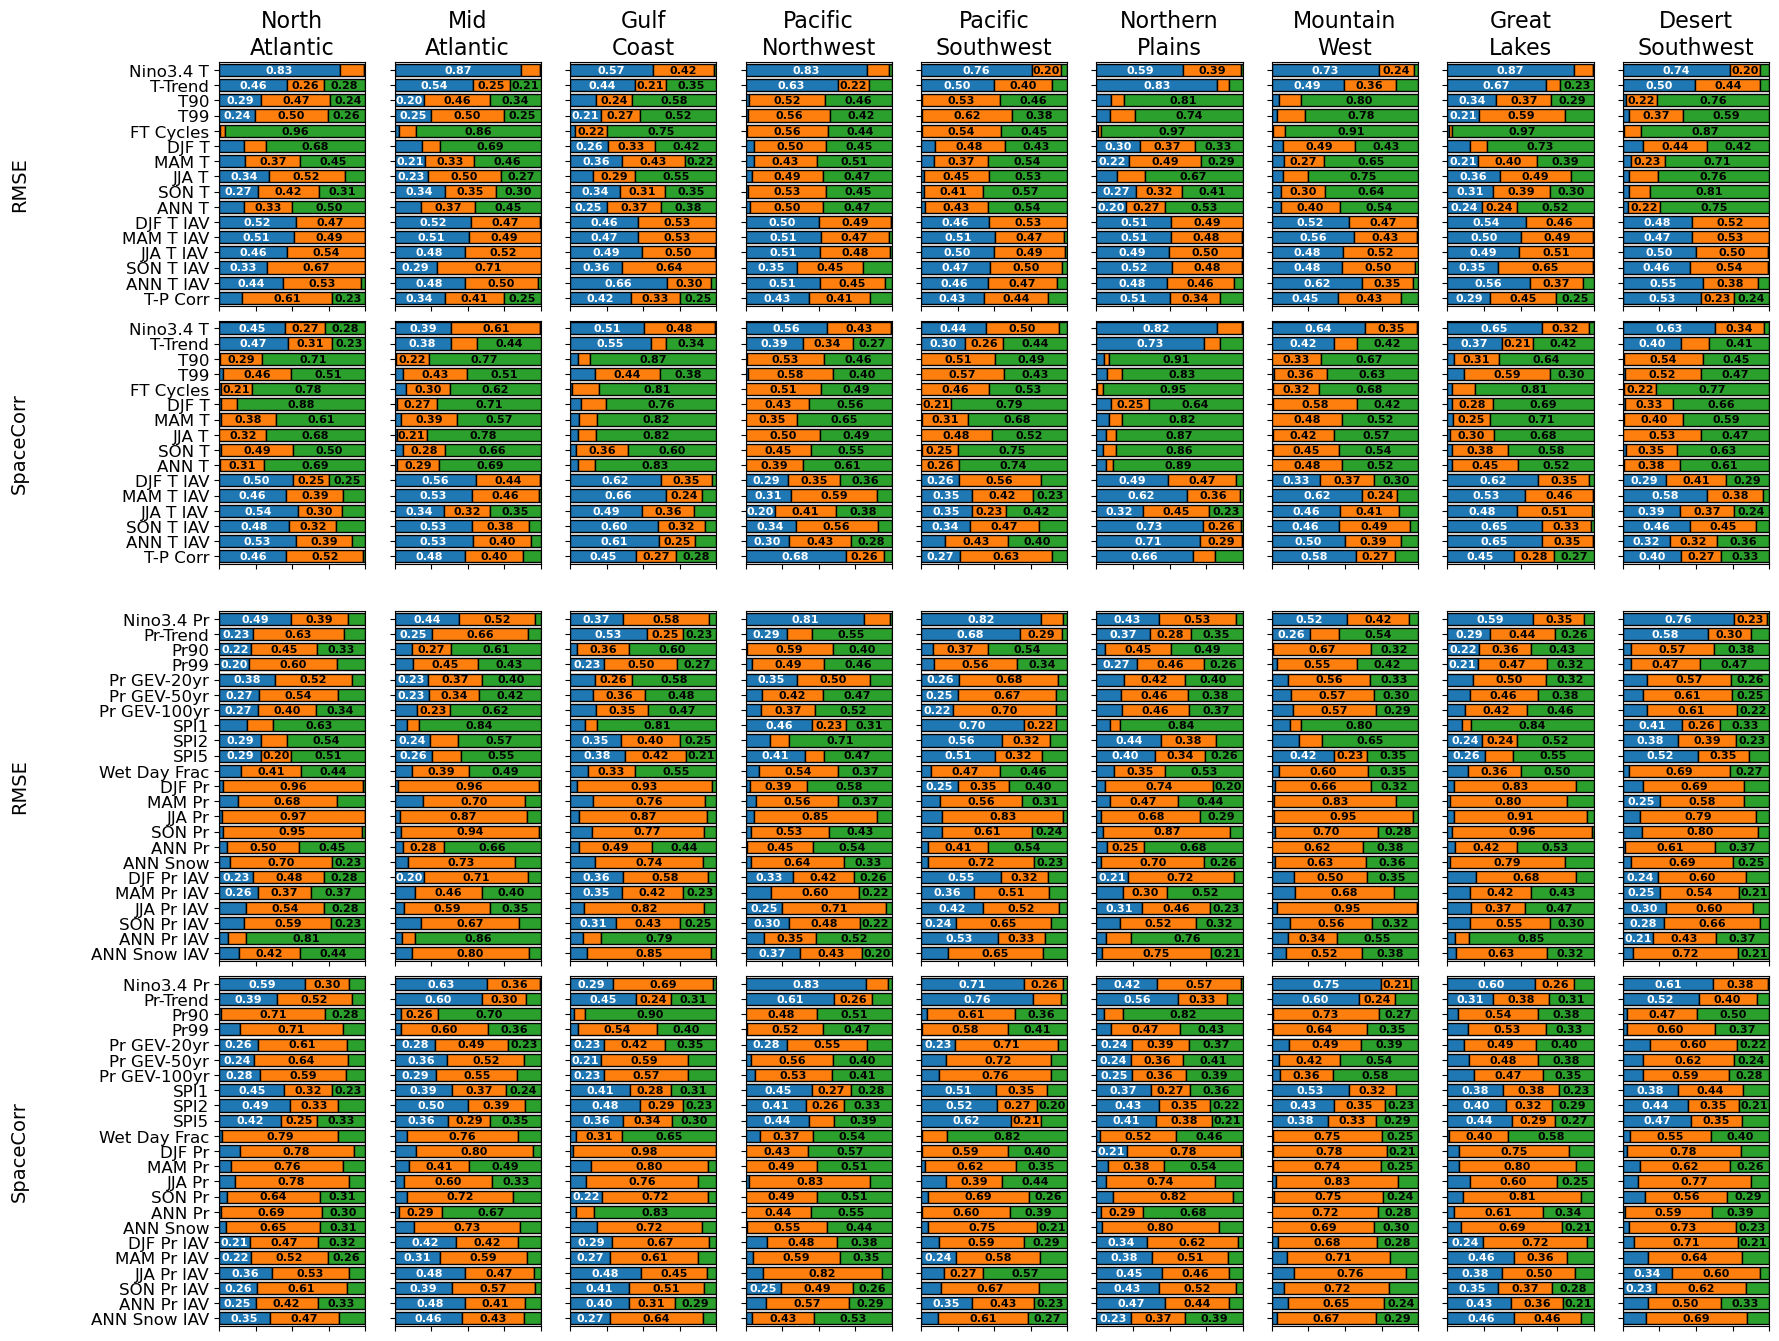

In [ ]:
## Figure S1

pltheights = []
wtmets = ['RMSE', 'SpaceCorr']
ptmets = ['RMSE', 'SpaceCorr']
for var in metvars[:2]:
    # if var == '':
    #     tmpmets = ['']
    #     pltheights.append(2)
    # else:
    tmpmets = wtmets
    for mettype in tmpmets:
        # print(mettype)
        pltheights.append(len(metlist_forplots[var][mettype].keys()))
        # print(pltwidths[i])


# Define the x-axis positions
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20,16))
gs = gridspec.GridSpec(4,9, height_ratios=pltheights)  # Adjust the width ratio of the third column
axs = [fig.add_subplot(gs[i, j]) for i in range(4) for j in range(9)]

cmap = plt.get_cmap('tab10')
plthresh = 0.2
for ivar, var in enumerate(metvars[:2]):
    # if var == '':
    #     tmpmets = ['']
    # else:
    tmpmets = wtmets
    print(tmpmets)
    for itype, mettype in enumerate(tmpmets):
        metlist = list(metlist_forplots[var][mettype].values())
        pltlist = list(metlist_forplots[var][mettype].keys())
        metlist = metlist[::-1]
        pltlist = pltlist[::-1]
        y = np.arange(len(metlist))
        # if ivar <= 1:
        for ireg in range(nreg):
            print(ivar*(nreg*2) + itype*(nreg) + ireg)
            ax = axs[ivar*(nreg*2) + itype*(nreg) + ireg]
            # else:
            #     ax = axs[ivar*2 + itype - 1]

            plt.sca(ax)
            y_mod = np.array([mod_var_tot[metric].isel(regions=ireg).item() for metric in metlist])
            y_meth = np.array([meth_var_tot[metric].isel(regions=ireg).item() for metric in metlist])
            y_obs = np.array([obs_var_tot[metric].isel(regions=ireg).item() for metric in metlist])
            # Plot the stacked bar chart
            ax.barh(y, y_mod, label='Model', color=cmap(0), edgecolor='black')
            ax.barh(y, y_meth, left=y_mod, label='Method', color=cmap(1), edgecolor='black')
            ax.barh(y, y_obs, left=y_mod + y_meth, label='Observational', color=cmap(2), edgecolor='black')

            for j in range(len(y)):
                modval = y_mod[j]
                methval = y_meth[j]
                obsval = y_obs[j]
                if modval >= plthresh:
                    ax.text(modval/2, y[j], f'{modval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold',c='white')
                if methval >= plthresh:
                    ax.text(modval + methval/2, y[j], f'{methval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')
                if obsval >= plthresh:
                    ax.text(modval + methval + obsval/2, y[j], f'{obsval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')
            ax.set_yticks(y)

            ax.set_xlim([0, 1])
            ax.set_ylim([-0.51, len(metlist)-0.49])
            if ireg == 0:
                ax.set_yticklabels(pltlist, fontsize=12)
                ax.set_ylabel(mettype, fontsize=14)
                ax.yaxis.set_label_coords(-1.3, 0.5)  # Adjust the y-coordinate for better label positioning
                # if itype == 0:
                #     plt.title(var, fontsize=16)
                #     if ivar == 0:
                #         plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            else:
                ax.set_yticklabels([])
            if (ivar == 2) and (itype == 1):
                ax.set_xticks([0,.25,.5,.75,1])
                ax.set_xticklabels(['0','0.25','0.5','0.75','1'])
            else:
                ax.set_xticks([0,.25,.5,.75,1])
                ax.set_xticklabels([])
                # Increase vertical space only between axes 2 and 3
                # Shift all axes after axis 2 down to make space between axes 2 and 3
            if (ivar == 0) and (itype == 0):
                pltreg = regions[ireg].replace(' ', '\n')
                plt.title(pltreg, fontsize=16)
plt.subplots_adjust(hspace=0.05)
plt.draw()
# for i, ax in enumerate(axs):
#     if i > 1:
#         pos = ax.get_position()
#         ax.set_position([pos.x0, pos.y0 - 0.02, pos.width, pos.height])
for itype in range(2):
    for ireg in range(nreg):
        ax = axs[(nreg*2) + itype*(nreg) + ireg]
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0 - 0.02, pos.width, pos.height])
# plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/SUPPLEMENTAL_ALLREGIONS_DS_split_uncertainty.png', dpi=300, bbox_inches='tight')


['wt5_clim_rmse', 'wt4_clim_rmse', 'wt3_clim_rmse', 'wt2_clim_rmse', 'wt1_clim_rmse', 'wt0_clim_rmse', 'wt5_daytoday_rmse', 'wt4_daytoday_rmse', 'wt3_daytoday_rmse', 'wt2_daytoday_rmse', 'wt1_daytoday_rmse', 'wt0_daytoday_rmse']
['wt5_clim_scorr', 'wt4_clim_scorr', 'wt3_clim_scorr', 'wt2_clim_scorr', 'wt1_clim_scorr', 'wt0_clim_scorr', 'wt5_daytoday_scorr', 'wt4_daytoday_scorr', 'wt3_daytoday_scorr', 'wt2_daytoday_scorr', 'wt1_daytoday_scorr', 'wt0_daytoday_scorr']


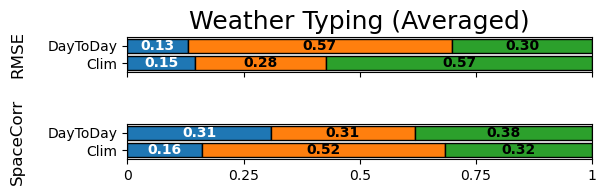

In [ ]:
## Figure 6

# Plot partitioned uncertainty for Weather Typing metrics, averaged over all 6 weather types

wtmets = ['RMSE', 'SpaceCorr']
pltheights_wt = [1, 1]  # Only one bar per metric type (average)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(6,1))
gs = gridspec.GridSpec(2,1, height_ratios=pltheights_wt)
axs = [fig.add_subplot(gs[i, 0]) for i in range(2)]

cmap = plt.get_cmap('tab10')
plthresh = 0.06

for itype, mettype in enumerate(wtmets):
    plt.sca(axs[itype])
    metlist = list(metlist_forplots['Weather Typing'][mettype].values())
    metlist = metlist[::-1]  # Reverse the order for plotting
    print(metlist)
    # Only use WT0-WT5 for each metric type (first 6 are DayToDay, next 6 are Clim)
    if mettype == 'RMSE':
        wt_metrics = [m for m in metlist if ('_rmse' in m)]
    else:
        wt_metrics = [m for m in metlist if ('_scorr' in m)]

    y_mod = np.array([mod_var_tot[m].mean(dim=['regions']).item() for m in wt_metrics])
    y_meth = np.array([meth_var_tot[m].mean(dim=['regions']).item() for m in wt_metrics])
    y_obs = np.array([obs_var_tot[m].mean(dim=['regions']).item() for m in wt_metrics])

    # Average over all 6 weather types
    avg_mod = np.zeros(2)
    avg_mod[0] = np.nanmean(y_mod[:6])
    avg_mod[1] = np.nanmean(y_mod[6:])  # For Clim metrics, if needed

    avg_meth = np.zeros(2)
    avg_meth[0] = np.nanmean(y_meth[:6])
    avg_meth[1] = np.nanmean(y_meth[6:])

    avg_obs = np.zeros(2)
    avg_obs[0] = np.nanmean(y_obs[:6])
    avg_obs[1] = np.nanmean(y_obs[6:])  # For Clim metrics, if needed


    ax = axs[itype]
    plt.sca(ax)
    y = np.array([0,1])
    ax.barh(y, avg_mod, label='Model', color=cmap(0), edgecolor='black')
    ax.barh(y, avg_meth, left=avg_mod, label='Method', color=cmap(1), edgecolor='black')
    ax.barh(y, avg_obs, left=avg_mod + avg_meth, label='Observational', color=cmap(2), edgecolor='black')

    # Annotate if above threshold
    for j in range(len(y)):
        modval = avg_mod[j]
        methval = avg_meth[j]
        obsval = avg_obs[j]
        if modval >= plthresh:
            ax.text(modval/2, j, f'{modval:.2f}', ha='center', va='center', fontsize=10, fontweight='bold',c='white')
        if methval >= plthresh:
            ax.text(modval + methval/2, j, f'{methval:.2f}', ha='center', va='center', fontsize=10, fontweight='bold')
        if obsval >= plthresh:
            ax.text(modval + methval + obsval/2, j, f'{obsval:.2f}', ha='center', va='center', fontsize=10, fontweight='bold')

    ax.set_yticks([0,1])
    ax.set_yticklabels(['Clim', 'DayToDay'], fontsize=10)
    ax.set_xlim([0, 1])
    ax.set_ylim([0-0.51, 1+0.49])
    ax.set_ylabel(mettype, fontsize=12)
    ax.yaxis.set_label_coords(-0.22, 0.5)
    if itype == 0:
        plt.title('Weather Typing (Averaged)', fontsize=18)
        # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    if itype == 1:
        ax.set_xticks([0,.25,.5,.75,1])
        ax.set_xticklabels(['0','0.25','0.5','0.75','1'])
    else:
        ax.set_xticks([0,.25,.5,.75,1])
        ax.set_xticklabels([])

# plt.subplots_adjust(hspace=.5)

# Increase vertical space between the two axes
# Move the second axis further down to increase vertical space between the two axes
pos1 = axs[0].get_position()
pos2 = axs[1].get_position()
axs[1].set_position([pos2.x0, pos2.y0 - 0.45, pos2.width, pos2.height])
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/new_regionalDS_split_uncertainty_weather_typing_avg.png', dpi=300, bbox_inches='tight')

['wt5_clim_rmse', 'wt4_clim_rmse', 'wt3_clim_rmse', 'wt2_clim_rmse', 'wt1_clim_rmse', 'wt0_clim_rmse', 'wt5_daytoday_rmse', 'wt4_daytoday_rmse', 'wt3_daytoday_rmse', 'wt2_daytoday_rmse', 'wt1_daytoday_rmse', 'wt0_daytoday_rmse']
['wt5_clim_scorr', 'wt4_clim_scorr', 'wt3_clim_scorr', 'wt2_clim_scorr', 'wt1_clim_scorr', 'wt0_clim_scorr', 'wt5_daytoday_scorr', 'wt4_daytoday_scorr', 'wt3_daytoday_scorr', 'wt2_daytoday_scorr', 'wt1_daytoday_scorr', 'wt0_daytoday_scorr']


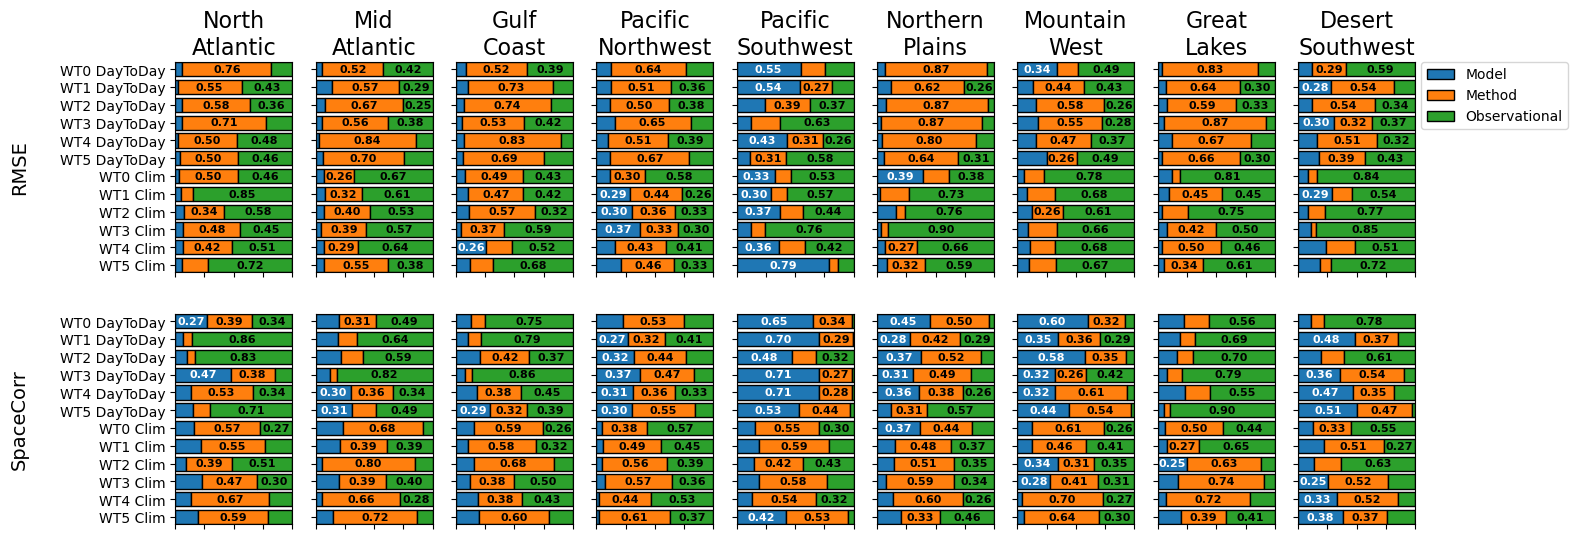

In [ ]:
## Figure S2

# Plot partitioned uncertainty for Weather Typing metrics, averaged over all 6 weather types

wtmets = ['RMSE', 'SpaceCorr']
pltheights_wt = [6, 6]  # Only one bar per metric type (average)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16,6))
gs = gridspec.GridSpec(2,9, height_ratios=pltheights_wt)
axs = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(9)]

cmap = plt.get_cmap('tab10')
plthresh = 0.25

for itype, mettype in enumerate(wtmets):
    plt.sca(axs[itype])
    metlist = list(metlist_forplots['Weather Typing'][mettype].values())
    pltmets = list(metlist_forplots['Weather Typing'][mettype].keys())
    metlist = metlist[::-1]  # Reverse the order for plotting
    pltmets = pltmets[::-1]
    print(metlist)
    # Only use WT0-WT5 for each metric type (first 6 are DayToDay, next 6 are Clim)
    if mettype == 'RMSE':
        wt_metrics = [m for m in metlist if ('_rmse' in m)]
    else:
        wt_metrics = [m for m in metlist if ('_scorr' in m)]

    for ireg, region in enumerate(regions):
        y_mod = np.array([mod_var_tot[m].isel(regions=ireg).item() for m in wt_metrics])
        y_meth = np.array([meth_var_tot[m].isel(regions=ireg).item() for m in wt_metrics])
        y_obs = np.array([obs_var_tot[m].isel(regions=ireg).item() for m in wt_metrics])
        
        ax = axs[itype*nreg + ireg]
        plt.sca(ax)
        y = np.arange(len(metlist))
        ax.barh(y, y_mod, label='Model', color=cmap(0), edgecolor='black')
        ax.barh(y, y_meth, left=y_mod, label='Method', color=cmap(1), edgecolor='black')
        ax.barh(y, y_obs, left=y_mod + y_meth, label='Observational', color=cmap(2), edgecolor='black')

        # Annotate if above threshold
        for j in range(len(y)):
            modval = y_mod[j]
            methval = y_meth[j]
            obsval = y_obs[j]
            if modval >= plthresh:
                ax.text(modval/2, j, f'{modval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold',c='white')
            if methval >= plthresh:
                ax.text(modval + methval/2, j, f'{methval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')
            if obsval >= plthresh:
                ax.text(modval + methval + obsval/2, j, f'{obsval:.2f}', ha='center', va='center', fontsize=8, fontweight='bold')

        ax.set_yticks(np.arange(12))
        if ireg == 0:
            ax.set_yticklabels(pltmets, fontsize=10)
            ax.set_ylabel(mettype, fontsize=14)
            ax.yaxis.set_label_coords(-1.25, 0.5)
        else:
            ax.set_yticklabels([])
        ax.set_xlim([0, 1])
        # ax.set_ylim([0, 1])
        ax.set_ylim([0-0.4, 11+0.4])

        
        if (itype == 0):
            plt.title(region.replace(' ', '\n'), fontsize=16)
            if ireg == nreg-1:
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        if itype == 1:
            ax.set_xticks([0,.25,.5,.75,1])
            ax.set_xticklabels([])
        else:
            ax.set_xticks([0,.25,.5,.75,1])
            ax.set_xticklabels([])

# plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/SUPPLEMENTAL_new_ALLREGIONDS_split_uncertainty_weather_typing_avg.png', dpi=300, bbox_inches='tight')

#### Plot maps of climate change signals based on best performing datasets

In [ ]:
COMPUTE=True

if COMPUTE:
    # Initialize a dictionary to store the sorted method-model combinations for each region
    sorted_combinations = {}
    # Iterate over each region
    for ireg, region in enumerate(regions):
        # Extract the mean error values for the current region
        region_errors = (summed_total/len(data_metlist)).sel(regions=region, normscheme='combstd')

        # Create a list of method-model combinations and their corresponding mean error values
        combinations = []
        for mod in models:
            for meth in methods:
                error_value = region_errors.sel(models=mod, methods=meth).item()
                if not np.isnan(error_value):
                    combinations.append((mod, meth, error_value))

        # Sort the combinations based on the mean error values
        sorted_combinations[region] = sorted(combinations, key=lambda x: x[2])
        gen.write_pickle(sorted_combinations, './sorted_combinations.pkl')
else:
    # Load the sorted combinations from the pickle file
    sorted_combinations = gen.read_pickle('./sorted_combinations.pkl')


import pandas as pd
for reg in regions:
    print(f"Region: {reg}")
    df = pd.DataFrame(sorted_combinations[reg][:5], columns=['Model', 'Method', 'Mean Error'])
    df['Method'] = df['Method'].map(pltmeth)
    df['Mean Error'] = df['Mean Error'].round(2)
    # Print as tab-separated values for easy copy-paste into Google Docs table
    print('\t'.join(df.columns))
    for _, row in df.iterrows():
        print('\t'.join(str(x) for x in row.values))
    print()  # Blank line between regions


In [ ]:
## Compute change signals from historical to future for each metric to be plotted, model, method, and RCP 8.5

fdiri = '/glade/work/nlybarger/downscaling_metrics/cmip5/'
scenarios = ['rcp45','rcp85']
future_metrics = {}
histo_metrics = {}
for regind, reg in enumerate(regions):
    regname = reg.replace(' ', '')
    future_metrics[reg] = {}
    histo_metrics[reg] = {}
    for mod in models:
        future_metrics[reg][mod] = {}
        histo_metrics[reg][mod] = {}
        for meth in methods:
            future_metrics[reg][mod][meth] = {}
            for scen in scenarios:
                ffili = f'{fdiri}{mod}.{meth}.{scen}.2064-2099.ds.conus.metric.maps.nc'
                if os.path.exists(ffili):
                    tmp = xr.open_dataset(ffili)
                    future_metrics[reg][mod][meth][scen] = xr.where(bukods['regions'] == regind+1, tmp, np.nan)

                else:
                    print(f'Future climate data not found for: {mod}.{meth}.{scen}')
                    continue
            if os.path.exists(ffili):
                hfili = f'{fdiri}{mod}.{meth}.hist.1981-2016.ds.conus.metric.maps.nc'
                tmp = xr.open_dataset(hfili)
                histo_metrics[reg][mod][meth] = xr.where(bukods['regions'] == regind+1, tmp, np.nan)


sorted_modlist = {}
sorted_methlist = {}
for ireg, reg in enumerate(regions):
        print(f'Processing region: {reg}')

        regname = reg.replace(' ', '')
        ncomb = len(sorted_combinations[reg])
        print(f'Number of valid model-method combinations in {reg}: {ncomb}')
        sorted_modlist[reg] = []
        sorted_methlist[reg] = []

        for icomb in range(ncomb):
            # if icomb % 10 == 0:
                # print(f'Processing combination {icomb+1} of {ncomb} for region {reg}')
            mod = sorted_combinations[reg][icomb][0]
            sorted_modlist[reg].append(mod)
            meth = sorted_combinations[reg][icomb][1]
            sorted_methlist[reg].append(meth)

            if future_metrics[reg][mod][meth] == {}:
                print(f'Future climate data in {reg} not found for: {mod}.{meth}')
                continue


COMPUTE = True
seasons = ['djf', 'mam', 'jja', 'son', 'ann']

varlist = ['pr90','pr99','t90','t99','MMM_p','MMM_t']
diffs = {}
sorted_modlist = {}
sorted_methlist = {}
if COMPUTE:
    for ireg, reg in enumerate(regions):
        print(f'Processing region: {reg}')
        diffs[reg] = {}

        regname = reg.replace(' ', '')
        ncomb = len(sorted_combinations[reg])
        sorted_modlist[reg] = []
        sorted_methlist[reg] = []
        for var in varlist:
            diffs[reg][var] = {}

        for icomb in range(ncomb):
            if icomb % 10 == 0:
                print(f'Processing combination {icomb+1} of {ncomb} for region {reg}')
            mod = sorted_combinations[reg][icomb][0]
            sorted_modlist[reg].append(mod)
            meth = sorted_combinations[reg][icomb][1]
            sorted_methlist[reg].append(meth)
            # if mod == 'ACCESS1-3' and meth == 'GARD_r3':
            #     continue
            if future_metrics[reg][mod][meth] == {}:
                print(f'Future climate data in {reg} not found for: {mod}.{meth}')
                continue
            else:
                for var in varlist:
                # for var in ['MMM_p','MMM_t']:
                    diffs[reg][var][icomb] = {}
                    if var in ['MMM_p','MMM_t']:
                        for seas in seasons:
                            diffs[reg][var][icomb][seas] = {}
                            diffs[reg][var][icomb][seas]['rcp45'] = (future_metrics[reg][mod][meth]['rcp45'][f'{seas}{var[-2:]}'] - 
                                                                    histo_metrics[reg][mod][meth][f'{seas}{var[-2:]}'])
                            diffs[reg][var][icomb][seas]['rcp85'] = (future_metrics[reg][mod][meth]['rcp85'][f'{seas}{var[-2:]}'] - 
                                                                    histo_metrics[reg][mod][meth][f'{seas}{var[-2:]}'])
                    else:
                        diffs[reg][var][icomb]['rcp45'] = (future_metrics[reg][mod][meth]['rcp45'][var] - 
                                                                histo_metrics[reg][mod][meth][var])
                        diffs[reg][var][icomb]['rcp85'] = (future_metrics[reg][mod][meth]['rcp85'][var] - 
                                                                histo_metrics[reg][mod][meth][var])
    gen.write_pickle(diffs, './regional_downscaling_future_diffs.pkl')
else:
    diffs = gen.read_pickle('./regional_downscaling_future_diffs.pkl')


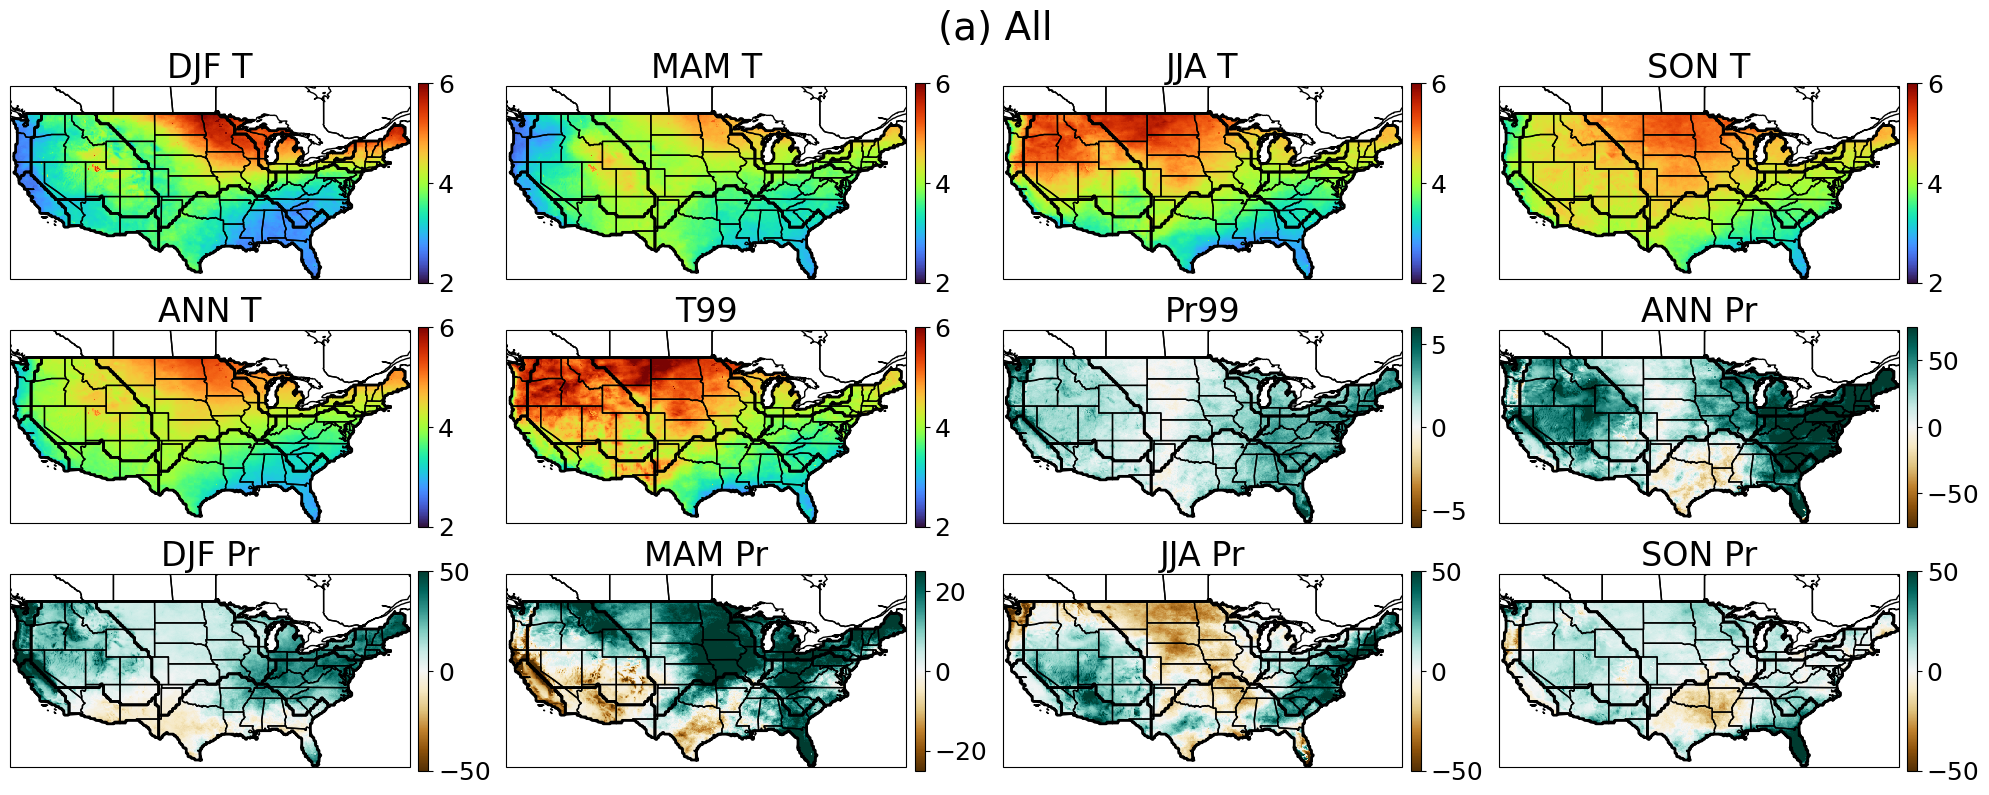

In [ ]:
## Figure 9(a)

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import skimage.measure

fig, axs = plt.subplots(3, 4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Define subplot_info and plot_scen before the plotting loop
plot_scen = 'rcp85'
plot_vars = ['MMM_t', 'MMM_p', 'pr99', 't99']
plot_seasons = ['djf', 'mam', 'jja', 'son', 'ann']
prmax = {'djf':50, 'mam':25, 'jja':50, 'son':50, 'ann':75}
pltfontsize = {'suptitle':28, 'title':24, 'axlabel':18}

subplot_info = []
for seas in plot_seasons:
    subplot_info.append({'plot_var': 'MMM_t', 'plot_seas': seas, 'title': f'{seas.upper()} T'})
# subplot_info.append({'plot_var': 'MMM_t', 'plot_seas': 'ann', 'title': f'Annual Mean T'})
subplot_info.append({'plot_var': 't99', 'plot_seas': 'ann', 'title': f'T99'})
subplot_info.append({'plot_var': 'pr99', 'plot_seas': 'ann', 'title': f'Pr99'})
subplot_info.append({'plot_var': 'MMM_p', 'plot_seas': 'ann', 'title': f'ANN Pr'})
for seas in plot_seasons[:-1]:
    subplot_info.append({'plot_var': 'MMM_p', 'plot_seas': seas, 'title': f'{seas.upper()} Pr'})

combined_maps = {}
combined_maps['all'] = {}
for idx, info in enumerate(subplot_info):
    i, j = divmod(idx, 4)
    ax = axs[i, j]
    plot_var = info['plot_var']
    plot_seas = info['plot_seas']

    # Only plot t99 and pr99 for 'ann' season
    if plot_var in ['t99', 'pr99'] and plot_seas != 'ann':
        ax.set_axis_off()
        continue

    region_means = {}
    region_masks = {}
    for reg in regions:
        regname = reg.replace(' ', '')
        region_maps = []
        if plot_var in ['MMM_t', 'MMM_p']:
            for icomb in diffs[reg][plot_var]:
                if plot_seas in diffs[reg][plot_var][icomb] and plot_scen in diffs[reg][plot_var][icomb][plot_seas]:
                    region_maps.append(diffs[reg][plot_var][icomb][plot_seas][plot_scen])
            if region_maps:
                region_mean = xr.concat(region_maps, dim='comb').mean(dim='comb', skipna=True)
                region_means[reg] = region_mean
                region_masks[reg] = ~np.isnan(region_mean)
            else:
                region_means[reg] = None
                region_masks[reg] = None
        else:
            # Only use 'ann' for pr99 and t99
            if plot_seas != 'ann':
                region_means[reg] = None
                region_masks[reg] = None
                continue
            for icomb in diffs[reg][plot_var]:
                if plot_scen in diffs[reg][plot_var][icomb]:
                    region_maps.append(diffs[reg][plot_var][icomb][plot_scen])
            if region_maps:
                region_mean = xr.concat(region_maps, dim='comb').mean(dim='comb', skipna=True)
                region_means[reg] = region_mean
                region_masks[reg] = ~np.isnan(region_mean)
            else:
                region_means[reg] = None
                region_masks[reg] = None

    # Get lat/lon from first available region
    lat, lon = None, None
    for reg in regions:
        if region_means[reg] is not None:
            lat = region_means[reg]['lat'].values
            lon = region_means[reg]['lon'].values
            break
    if lat is None or lon is None:
        ax.set_axis_off()
        continue

    combined_map = np.full((len(lat), len(lon)), np.nan)
    for reg in regions:
        if region_means[reg] is not None:
            mask = region_masks[reg]
            combined_map[mask] = region_means[reg].values[mask]

    # Set vmin/vmax/cmap for each plot individually
    if plot_var == 'MMM_p':
        vmax = prmax[plot_seas]
        vmin = -vmax
        cmap = 'BrBG'
    elif plot_var == 'MMM_t':
        vmin = 2
        vmax = 6
        cmap = 'turbo'
    elif plot_var.startswith('pr'):
        vmax = 6
        vmin = -vmax
        cmap = 'BrBG'
    else:
        vmin = 2
        vmax = 6
        cmap = 'turbo'
    
    if plot_var in ['MMM_t', 'MMM_p']:
        combined_maps['all'][f'{plot_var}_{plot_seas}'] = combined_map
    else:
        combined_maps['all'][f'{plot_var}'] = combined_map
    im = ax.pcolormesh(lon, lat, combined_map, cmap=cmap, shading='auto', vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.set_title(info['title'],fontsize=pltfontsize['title'])

    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.025, pad=0.02)
    cbar.ax.tick_params(labelsize=pltfontsize['axlabel'])
    for ireg, region in enumerate(regions):
        region_mask = region_masks[region].load().data
        if region_mask is not None:
            # Ensure mask is 2D and binary
            mask_int = np.array(region_mask, dtype=int)
            # Find contours at the 0.5 level
            contours = skimage.measure.find_contours(mask_int, 0.5)
            if len(contours) == 0:
                print(f"No contours found for region {region}")
            for contour in contours:
                row_inds = np.round(contour[:, 0]).astype(int)
                col_inds = np.round(contour[:, 1]).astype(int)

                ax.plot(lon[col_inds], lat[row_inds], transform=ccrs.PlateCarree(), color='black', linewidth=2, zorder=10)

plt.suptitle('(a) All', fontsize=pltfontsize['suptitle'])
plt.tight_layout()
# plt.show()
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/pandt_cc_all.png', dpi=300, bbox_inches='tight')

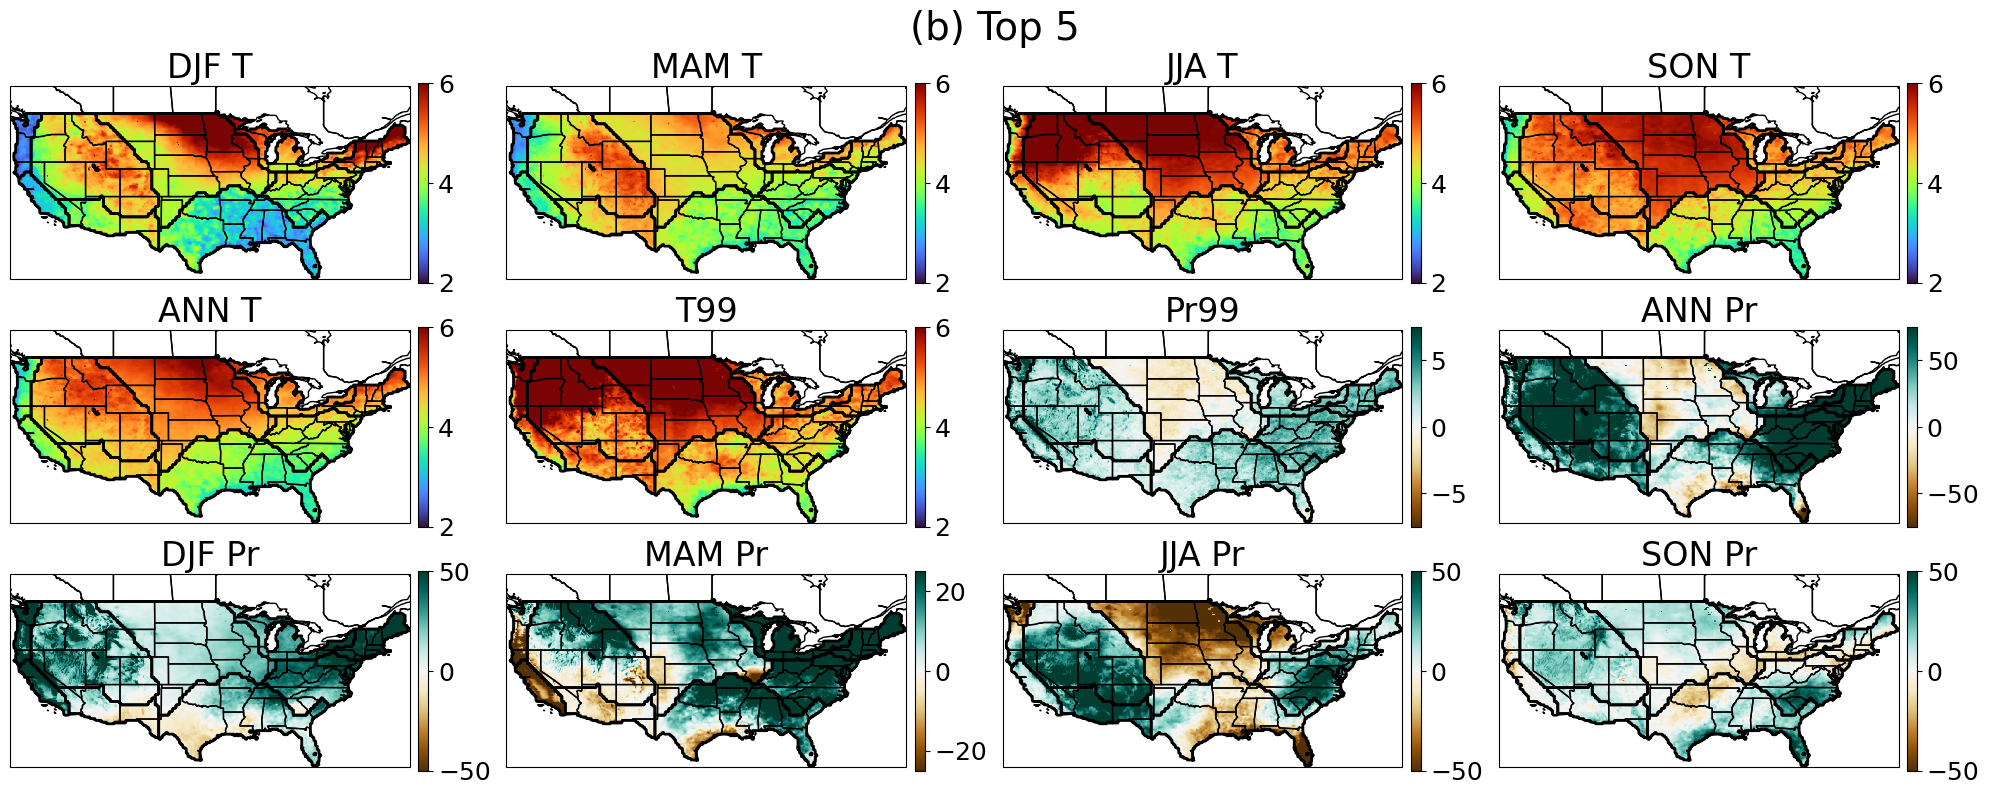

In [ ]:
## Figure 9(b)

fig, axs = plt.subplots(3, 4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

combined_maps['top5'] = {}
for idx, info in enumerate(subplot_info):
    i, j = divmod(idx, 4)
    ax = axs[i, j]
    plot_var = info['plot_var']
    plot_seas = info['plot_seas']

    if plot_var in ['t99', 'pr99'] and plot_seas != 'ann':
        ax.set_axis_off()
        continue

    region_means = {}
    region_masks = {}
    for reg in regions:
        regname = reg.replace(' ', '')
        region_maps = []
        # Get top 5 indices for this region
        combs = list(diffs[reg][plot_var].keys())
        # Only keep indices that exist for this region
        top5_inds = np.array([i for i in range(len(combs))])[:5]
        top_inds = top5_inds if isinstance(top5_inds, (list, np.ndarray)) else np.arange(5)
        if plot_var in ['MMM_t', 'MMM_p']:
            combs = list(diffs[reg][plot_var].keys())
            # Only use top 5 combinations that exist
            top_combs = [combs[k] for k in top_inds if k < len(combs)]
            for icomb in top_combs:
                if plot_seas in diffs[reg][plot_var][icomb] and plot_scen in diffs[reg][plot_var][icomb][plot_seas]:
                    region_maps.append(diffs[reg][plot_var][icomb][plot_seas][plot_scen])
            if region_maps:
                region_mean = xr.concat(region_maps, dim='comb').mean(dim='comb', skipna=True)
                region_means[reg] = region_mean
                region_masks[reg] = ~np.isnan(region_mean)
            else:
                region_means[reg] = None
                region_masks[reg] = None
        else:
            if plot_seas != 'ann':
                region_means[reg] = None
                region_masks[reg] = None
                continue
            combs = list(diffs[reg][plot_var].keys())
            top_combs = [combs[k] for k in top_inds if k < len(combs)]
            for icomb in top_combs:
                if plot_scen in diffs[reg][plot_var][icomb]:
                    region_maps.append(diffs[reg][plot_var][icomb][plot_scen])
            if region_maps:
                region_mean = xr.concat(region_maps, dim='comb').mean(dim='comb', skipna=True)
                region_means[reg] = region_mean
                region_masks[reg] = ~np.isnan(region_mean)
            else:
                region_means[reg] = None
                region_masks[reg] = None

    lat, lon = None, None
    for reg in regions:
        if region_means[reg] is not None:
            lat = region_means[reg]['lat'].values
            lon = region_means[reg]['lon'].values
            break
    if lat is None or lon is None:
        ax.set_axis_off()
        continue

    combined_map = np.full((len(lat), len(lon)), np.nan)
    for reg in regions:
        if region_means[reg] is not None:
            mask = region_masks[reg]
            combined_map[mask] = region_means[reg].values[mask]

    if plot_var == 'MMM_p':
        # vmax = np.nanpercentile(np.abs(combined_map), 99)
        vmax = prmax[plot_seas]
        vmin = -vmax
        cmap = 'BrBG'
    elif plot_var == 'MMM_t':
        vmin = 2
        vmax = 6
        cmap = 'turbo'
    elif plot_var.startswith('pr'):
        # vmax = np.nanpercentile(np.abs(combined_map), 99)
        vmax = 7.5
        vmin = -vmax
        cmap = 'BrBG'
    else:
        vmin = 2
        vmax = 6
        cmap = 'turbo'

    if plot_var in ['MMM_t', 'MMM_p']:
        combined_maps['top5'][f'{plot_var}_{plot_seas}'] = combined_map
    else:
        combined_maps['top5'][f'{plot_var}'] = combined_map

    im = ax.pcolormesh(lon, lat, combined_map, cmap=cmap, shading='auto', vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.set_title(info['title'], fontsize=pltfontsize['title'])
    for ireg, region in enumerate(regions):
        region_mask = region_masks[region].load().data
        if region_mask is not None:
            # Ensure mask is 2D and binary
            mask_int = np.array(region_mask, dtype=int)
            # Find contours at the 0.5 level
            contours = skimage.measure.find_contours(mask_int, 0.5)
            if len(contours) == 0:
                print(f"No contours found for region {region}")
            for contour in contours:
                row_inds = np.round(contour[:, 0]).astype(int)
                col_inds = np.round(contour[:, 1]).astype(int)

                ax.plot(lon[col_inds], lat[row_inds], transform=ccrs.PlateCarree(), color='black', linewidth=2, zorder=10)

    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.025, pad=0.02)
    # cbar.set_label(f'{plot_var}')
    cbar.ax.tick_params(labelsize=pltfontsize['axlabel'])

plt.suptitle('(b) Top 5', fontsize=pltfontsize['suptitle'])
plt.tight_layout()
# plt.show()
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/pandt_cc_top5.png', dpi=300, bbox_inches='tight')


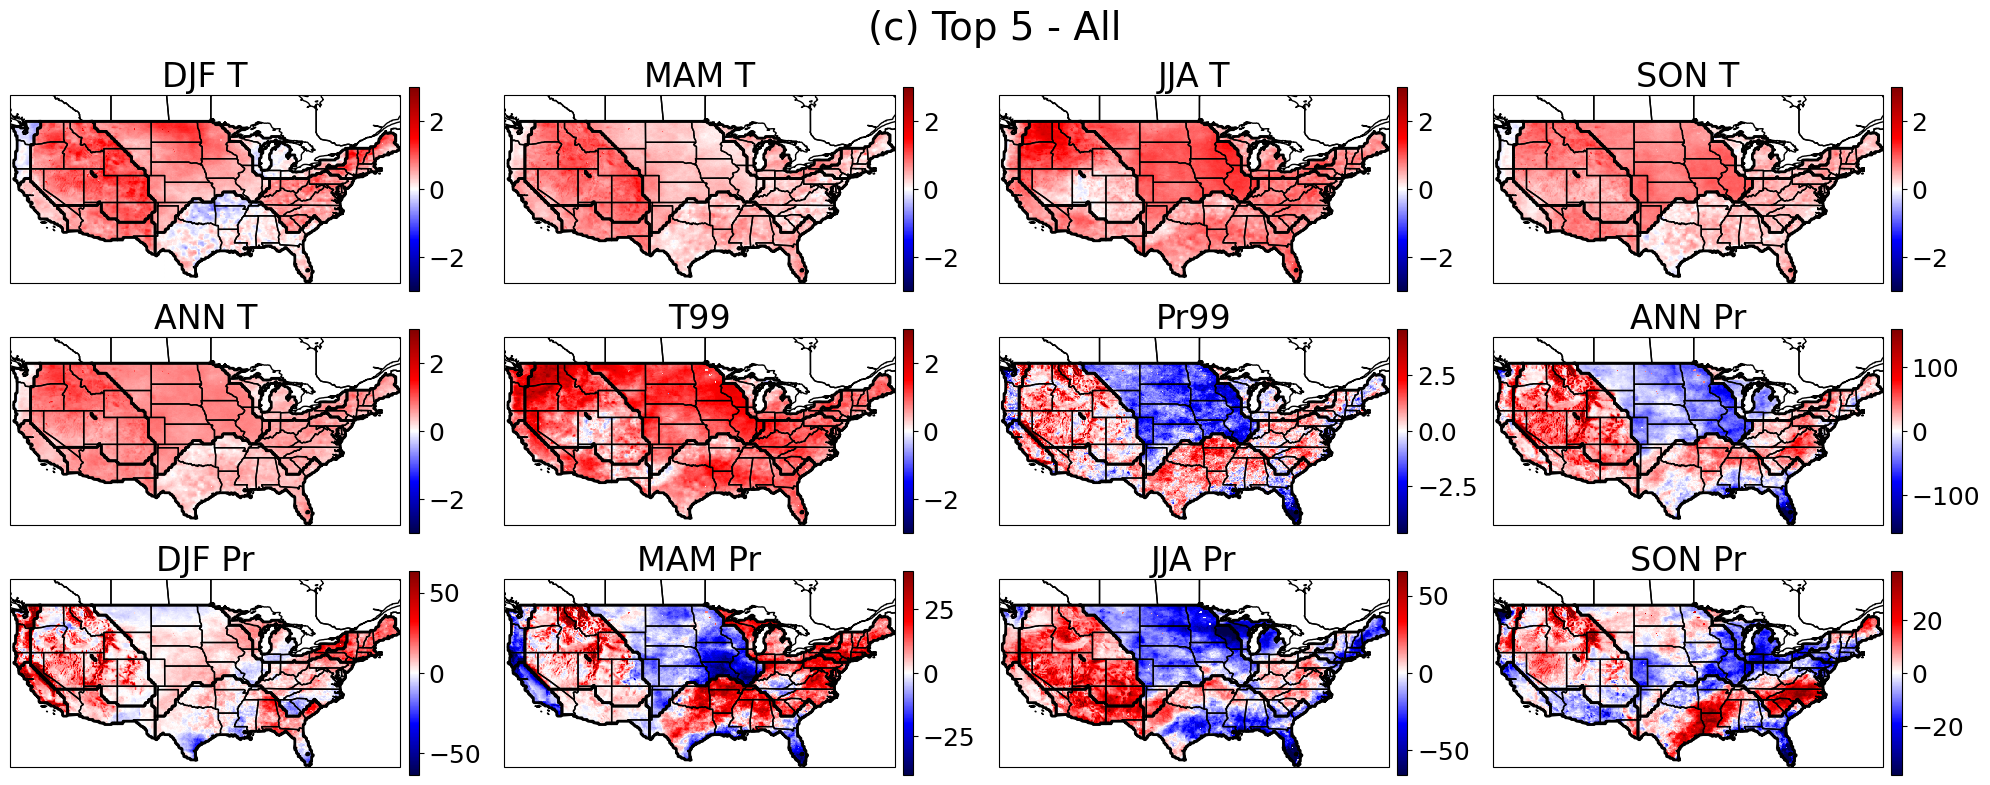

In [ ]:
## Figure 9(c)

fig, axs = plt.subplots(3, 4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for idx, info in enumerate(subplot_info):
    i, j = divmod(idx, 4)
    ax = axs[i, j]
    plot_var = info['plot_var']
    plot_seas = info['plot_seas']

    # Only plot t99 and pr99 for 'ann' season
    if plot_var in ['t99', 'pr99'] and plot_seas != 'ann':
        ax.set_axis_off()
        continue

    # Key for combined_maps
    if plot_var in ['MMM_t', 'MMM_p']:
        key = f"{plot_var}_{plot_seas}"
    else:
        key = plot_var

    # Compute the difference map
    if key in combined_maps['all'] and key in combined_maps['top5']:
        diff_map = combined_maps['top5'][key] - combined_maps['all'][key]
    else:
        ax.set_axis_off()
        continue

    # Set color limits and colormap
    if plot_var.startswith('MMM_p') or plot_var.startswith('pr'):
        vmax = np.nanpercentile(np.abs(diff_map), 99)
        vmin = -vmax
        cmap = 'seismic'
    else:
        # vmax = np.nanpercentile(np.abs(diff_map), 99)
        vmax = 3
        vmin = -vmax
        cmap = 'seismic'

    # Plot the difference map
    im = ax.pcolormesh(lon, lat, diff_map, cmap=cmap, shading='auto', vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.set_title(info['title'], fontsize=pltfontsize['title'])
    for ireg, region in enumerate(regions):
        region_mask = region_masks[region].load().data
        if region_mask is not None:
            # Ensure mask is 2D and binary
            mask_int = np.array(region_mask, dtype=int)
            # Find contours at the 0.5 level
            contours = skimage.measure.find_contours(mask_int, 0.5)
            if len(contours) == 0:
                print(f"No contours found for region {region}")
            for contour in contours:
                row_inds = np.round(contour[:, 0]).astype(int)
                col_inds = np.round(contour[:, 1]).astype(int)

                ax.plot(lon[col_inds], lat[row_inds], transform=ccrs.PlateCarree(), color='black', linewidth=2, zorder=10)

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.025, pad=0.02)
    cbar.ax.tick_params(labelsize=pltfontsize['axlabel'])
    # cbar.set_label('Top 5 - All')

# plt.suptitle('Difference Maps: Top 5 - All Model/Method Combinations', fontsize=16, y=1.02)
plt.suptitle('(c) Top 5 - All', fontsize=pltfontsize['suptitle'])
plt.tight_layout()
# plt.show()
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/pandt_cc_top5-all.png', dpi=300, bbox_inches='tight')

In [174]:
# Calculate the average rank among model-method combinations for each region and method

# Use summed_total for ranking (e.g., for 'combstd' normscheme)
normscheme = 'combstd'
avg_ranks = np.full((len(regions), len(methods)), np.nan)

for ireg, region in enumerate(regions):
    # Extract the summed_total for the region and normscheme
    region_scores = summed_total.sel(regions=region, normscheme=normscheme)
    # Flatten to (models, methods)
    scores = region_scores.values
    # Rank all model-method combinations (lower score = better rank)
    ranks = np.empty_like(scores)
    ranks[:] = np.nan
    valid_mask = ~np.isnan(scores)
    ranks[valid_mask] = scores[valid_mask].argsort().argsort() + 1  # ranks start at 1
    # Average rank for each method (across models)
    for imeth in range(len(methods)):
        method_ranks = ranks[:, imeth]
        avg_ranks[ireg, imeth] = np.nanmean(method_ranks)

# Create a DataFrame for easier viewing
avg_rank_df = pd.DataFrame(avg_ranks, index=regions, columns=methods)
print(avg_rank_df)

# Find the method with the lowest average rank for each region
best_methods = {}
for ireg, region in enumerate(regions):
    min_idx = np.nanargmin(avg_ranks[ireg])
    best_methods[region] = methods[min_idx]
    print(f"Region: {region}, Best Method: {methods[min_idx]}, Avg Rank: {avg_ranks[ireg, min_idx]:.2f}")

                        ICAR  ICARwest    GARD_r2    GARD_r3   LOCA_8th  MACA  \
North Atlantic     24.833333       NaN  23.000000  18.666667   4.000000   8.4   
Mid Atlantic       20.666667       NaN  27.833333  24.666667   4.500000   8.4   
Gulf Coast         19.500000       NaN  27.000000  26.000000   3.666667  10.2   
Pacific Northwest  21.000000     12.25  16.166667  16.833333  12.833333  22.2   
Pacific Southwest  19.833333     21.00  17.333333  15.500000  14.000000  18.4   
Northern Plains     5.666667       NaN  19.833333  15.333333  14.833333  22.6   
Mountain West      25.833333      8.00  18.833333  21.166667   8.000000  17.2   
Great Lakes        16.500000       NaN  29.000000  25.333333   4.500000   9.0   
Desert Southwest   16.500000     14.75  23.500000  19.333333   8.333333  20.6   

                   NASA-NEX  
North Atlantic        24.00  
Mid Atlantic          13.25  
Gulf Coast            13.25  
Pacific Northwest     35.50  
Pacific Southwest     31.75  
Northern 

/glade/derecho/scratch/nlybarger/tmp/ipykernel_37100/3963510218.py:20: RuntimeWarning: Mean of empty slice
  avg_ranks[ireg, imeth] = np.nanmean(method_ranks)


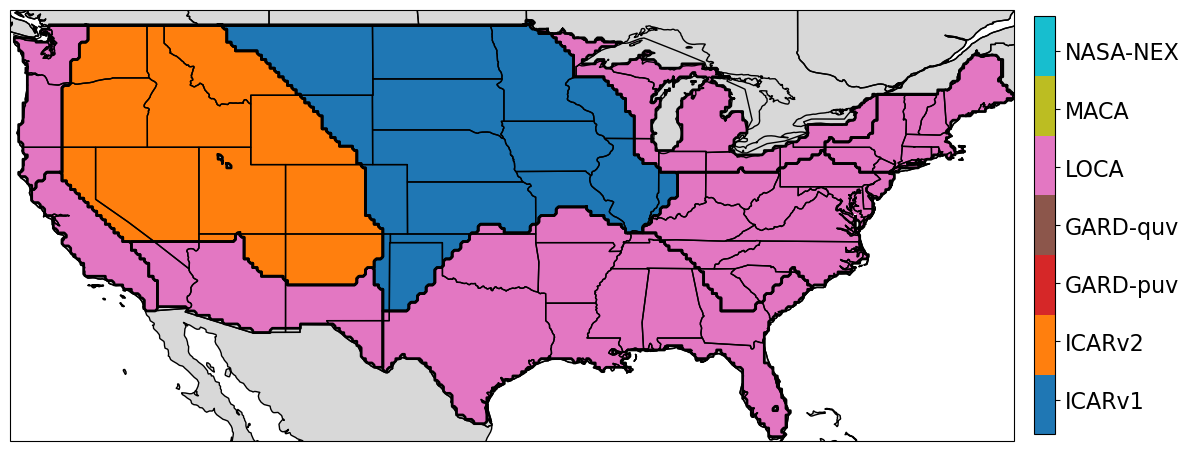

In [ ]:
## Figure 8

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import skimage.measure

# Prepare a color for each method (or model-method combo if you prefer)
method_colors = {meth: i for i, meth in enumerate(methods)}
cmap = plt.get_cmap('tab10', len(methods))

# Create an empty map for method indices
# You need to define 'tmp' before using it.
# For example, if you want to plot a specific metric, select it from a dataset such as 'histo_metrics' or 'future_metrics'.
# Here's an example using 'histo_metrics' for the first region, model, and method:

region = regions[0]
mod = sorted_modlist[region][0]
meth = sorted_methlist[region][0]
# Choose a metric to plot, e.g., 'n34pr'
var_to_plot = 'n34pr'

# Example: use histo_metrics for demonstration
tmp = histo_metrics[region][mod][meth]

lat = tmp['lat'].values
lon = tmp['lon'].values
best_method_map = np.full((len(lat), len(lon)), np.nan)

# For each region, fill in the region mask with the index of the best method
for ireg, region in enumerate(regions):
    # mod = sorted_modlist[region][0]
    # meth = sorted_methlist[region][0]
    # Get the metric map for this model/method
    # metric_map = histo_metrics[region][mod][meth][var_to_plot]

    # Mask for this region (assume you have buco or similar region mask)
    # If you have buco or bucods, use that mask:
    # region_mask = (bucods['mask'].values == ireg+1)
    # For demonstration, use non-nan values in metric_map
    region_mask = region_masks[region]

    # meth = best_methods[region]
    meth = methods[summed_total.sel(regions=region, normscheme='combstd').mean(dim='models').argmin(dim='methods').item()]
    # Find the boundaries of the region mask and plot them
    
    best_method_map[region_mask] = method_colors[meth]

# Plot the single map
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.pcolormesh(lon, lat, best_method_map, cmap=cmap, shading='auto', vmin=0, vmax=len(methods)-1)
for ireg, region in enumerate(regions):
    region_mask = region_masks[region].load().data
    if region_mask is not None:
        # Ensure mask is 2D and binary
        mask_int = np.array(region_mask, dtype=int)
        # Find contours at the 0.5 level
        contours = skimage.measure.find_contours(mask_int, 0.5)
        if len(contours) == 0:
            print(f"No contours found for region {region}")
        for contour in contours:
            row_inds = np.round(contour[:, 0]).astype(int)
            col_inds = np.round(contour[:, 1]).astype(int)

            ax.plot(lon[col_inds], lat[row_inds], transform=ccrs.PlateCarree(), color='black', linewidth=2, zorder=10)
# ...existing code...

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', linewidth=1)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='gray', alpha=0.3)
ax.set_ylim(lat.min(), lat.max() - 3)
# ax.set_title('Best Performing Downscaling Method by Region', fontsize=20)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.02, ticks=range(len(methods)))
cbar.ax.set_yticklabels(list(pltmeth.values()))
cbar.ax.tick_params(labelsize=16)
# Center the colorbar ticks and labels
cbar.set_ticks(np.linspace(1, 6, len(methods))-.5)
cbar.set_ticklabels(list(pltmeth.values()))
plt.tight_layout()
# plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/top_method_spatial_single.png', dpi=300, bbox_inches='tight')


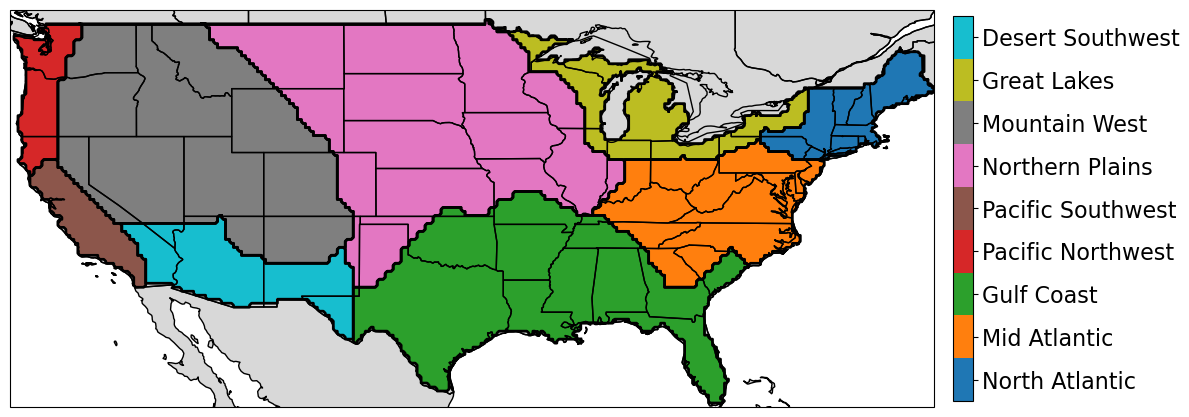

In [ ]:
## Figure 1


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import skimage.measure
_, bukods = fdse.make_buko_region_map(res='icargrid')

# Prepare a color for each method (or model-method combo if you prefer)
method_colors = {reg: i for i, reg in enumerate(regions)}
cmap = plt.get_cmap('tab10', len(regions))

# Create an empty map for method indices
# You need to define 'tmp' before using it.
# For example, if you want to plot a specific metric, select it from a dataset such as 'histo_metrics' or 'future_metrics'.
# Here's an example using 'histo_metrics' for the first region, model, and method:

# region = regions[0]
# mod = sorted_modlist[region][0]
# meth = sorted_methlist[region][0]
# Choose a metric to plot, e.g., 'n34pr'
var_to_plot = 'n34pr'

# Example: use histo_metrics for demonstration
# tmp = histo_metrics[region][mod][meth]

lat = bukods['lat'].values
lon = bukods['lon'].values
best_method_map = np.full((len(lat), len(lon)), np.nan)

# For each region, fill in the region mask with the index of the best method

# Plot the single map
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.pcolormesh(lon, lat, bukods['regions'], cmap=cmap, shading='auto', vmin=1, vmax=len(regions)+1)
for ireg, region in enumerate(regions):
    region_mask = xr.where(bukods['regions'] == ireg+1, 1, 0)
    if region_mask is not None:
        # Ensure mask is 2D and binary
        mask_int = np.array(region_mask, dtype=int)
        # Find contours at the 0.5 level
        contours = skimage.measure.find_contours(mask_int, 0.5)
        if len(contours) == 0:
            print(f"No contours found for region {region}")
        for contour in contours:
            row_inds = np.round(contour[:, 0]).astype(int)
            col_inds = np.round(contour[:, 1]).astype(int)

            ax.plot(lon[col_inds], lat[row_inds], transform=ccrs.PlateCarree(), color='black', linewidth=2, zorder=10)

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', linewidth=1)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='gray', alpha=0.3)
ax.set_ylim(lat.min(), lat.max() - 3)
# ax.set_title('Best Performing Downscaling Method by Region', fontsize=20)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.02, ticks=range(len(regions)))
cbar.ax.set_yticklabels(list(reversed(regions)))
cbar.ax.tick_params(labelsize=16)
# Center the colorbar ticks and labels
cbar.set_ticks(np.linspace(2, 10, len(regions))-.5)
cbar.set_ticklabels(list(regions))
plt.tight_layout()
plt.savefig('/glade/work/nlybarger/images/downscaling/paper_plots/bukods_map.png', dpi=300, bbox_inches='tight')
